In [1]:
# import thư viện 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Phần 1: Đọc tập tin dữ liệu dự báo giá nhà 

1. **Đọc tập tin dữ liệu `housing-prices-dataset.csv`**
2. **Xem thông tin sơ bộ**
3. **Kiểm tra dữ liệu bị trùng và xử lý (nếu có)**


#### 1. Đọc tập tin dữ liệu housing-prices-dataset.csv 

In [ ]:
# đọc tập tin dữ liệu housing-prices-dataset.csv
file_path = r'housing-prices-dataset.csv'  
data = pd.read_csv(file_path)

### 2. Xem thông tin sơ bộ : shape/head/tail/info …

In [3]:
# xem 5 dòng đầu tiên
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Xem 5 dòng cuối
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
# Xóa cột ID khỏi dataframe 
data = data.drop('Id', axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Hiển thị kích thước của dataframe
data.shape


(1460, 80)

In [7]:
# Thông tin tổng quan về dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
# Thống kê dữ liệu dạng số
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 3. Kiểm tra dữ liệu bị trùng và xử lý (nếu có) 

In [9]:
# Kiểm tra xem có dữ liệu trùng lặp hay không
if data.duplicated().any():
    print("Có dữ liệu trùng lặp trong DataFrame.")
else:
    print("Không có dữ liệu trùng lặp trong DataFrame.")

Không có dữ liệu trùng lặp trong DataFrame.


## Phần 2 : EDA 
1. Chọn các biến sau đây để phân tích : `'LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice'` - Chú ý : biến `SalePrice` là biến output. 
2. Trong các biến trên hãy xác định các biến định tính và các biến định lượng. In thông tin các biến này như số lượng giá trị duy nhất và các giá trị duy nhất. 
3. Kiểm tra dữ liệu bị thiếu và xử lý (nếu có). 
4. Thực hiện thống kê mô tả (`describe`) cho các biến trên và nêu nhận xét. - Phân tích tất cả các biến được chọn trong câu 1. 
5. Phân tích 1 biến (cho nhận xét). 
6. Phân tích 2 biến (cho nhận xét). 
7. Kiểm tra và xóa các outlier (nếu có).

#### 1. Chọn các biến sau đây để phân tích : 'LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice' (Chú ý : biến SalePrice là biến output) 

In [ ]:
# Danh sách các cột cần chọn
selected_columns = [
    'LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', 
    '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 
    'TotRmsAbvGrd', 'SalePrice'
]
# Tạo DataFrame mới chỉ chứa các cột được chọn
selected_data = data[selected_columns]

selected_data.head()

,LotShape,Street,HouseStyle,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,Reg,Pave,2Story,8450,2003,856,854,2,3,8,208500
1,Reg,Pave,1Story,9600,1976,1262,0,2,3,6,181500
2,IR1,Pave,2Story,11250,2001,920,866,2,3,6,223500
3,IR1,Pave,2Story,9550,1915,961,756,1,3,7,140000
4,IR1,Pave,2Story,14260,2000,1145,1053,2,4,9,250000


In [11]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1460 non-null   object
 1   Street        1460 non-null   object
 2   HouseStyle    1460 non-null   object
 3   LotArea       1460 non-null   int64 
 4   YearBuilt     1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   2ndFlrSF      1460 non-null   int64 
 7   FullBath      1460 non-null   int64 
 8   BedroomAbvGr  1460 non-null   int64 
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  SalePrice     1460 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 125.6+ KB


###  2. Trong các biến trên hãy xác định các biến định tính và các biến định lượng. In thông tin các biến này như số lượng giá trị duy nhất và các giá trị duy nhất 

##### Xác định các biến định tính và in thông tin

In [12]:
cat_cols = selected_data.select_dtypes(include=['object']).columns
cat_cols

Index(['LotShape', 'Street', 'HouseStyle'], dtype='object')

In [13]:
for col in cat_cols:
    print(col, data[col].nunique()) 

LotShape 4
Street 2
HouseStyle 8


In [14]:
for col in cat_cols:    
    if selected_data[col].nunique()<=10:
        print(f'{col} - {selected_data[col].unique()}')
    else:
        print(f'{col} - unique value: {selected_data[col].nunique()}')
# biến phân loại: LotShape , Street  , HouseStyle       

LotShape - ['Reg' 'IR1' 'IR2' 'IR3']
Street - ['Pave' 'Grvl']
HouseStyle - ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


#### Xác định các biến định lượng và in thông tin

In [15]:
num_cols = selected_data.select_dtypes(include=['number']).columns
num_cols

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice'],
      dtype='object')

In [16]:
for col in num_cols:
    print(col, selected_data[col].nunique()) # biến phân loại: FullBath ,BedroomAbvGr 

LotArea 1073
YearBuilt 112
1stFlrSF 753
2ndFlrSF 417
FullBath 4
BedroomAbvGr 8
TotRmsAbvGrd 12
SalePrice 663


In [17]:
# Xem lại thêm TotRmsAbvGrd  vì thầy có 12 giá trị 
for col in num_cols:    
    if selected_data[col].nunique()<=12:
        print(f'{col} - {selected_data[col].unique()}')
    else:
        print(f'{col} - unique value: {selected_data[col].nunique()}')


# biến số liên tục: LotArea , YearBuilt ,1stFlrSF ,2ndFlrSF ,SalePrice 
# biến phân loại: FullBath , BedroomAbvGr , TotRmsAbvGrd 

LotArea - unique value: 1073
YearBuilt - unique value: 112
1stFlrSF - unique value: 753
2ndFlrSF - unique value: 417
FullBath - [2 1 3 0]
BedroomAbvGr - [3 4 1 2 0 5 6 8]
TotRmsAbvGrd - [ 8  6  7  9  5 11  4 10 12  3  2 14]
SalePrice - unique value: 663


In [18]:
selected_data.columns

Index(['LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', '1stFlrSF',
       '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice'],
      dtype='object')

### 3. Kiểm tra dữ liệu bị thiếu và xử lý (nếu có)

In [19]:
# kiểm tra dữ liệu bị thiếu
selected_data.isnull().sum()
# Dữ liệu xem từ info và isnull thì không có bị thiếu

LotShape        0
Street          0
HouseStyle      0
LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

In [20]:
# output: SalePrice
# input: 'LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
# category: FullBath , BedroomAbvGr , TotRmsAbvGrd, LotShape , Street  , HouseStyle  
# biến số liên tục: LotArea , YearBuilt ,1stFlrSF ,2ndFlrSF  

In [21]:
# Danh sách các cột cần chuyển thành category
category_cols = ['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'LotShape', 'Street', 'HouseStyle']

# Chuyển đổi các cột sang kiểu category
for col in category_cols:
    selected_data[col] = selected_data[col].astype('category')

selected_data.head()


,LotShape,Street,HouseStyle,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,Reg,Pave,2Story,8450,2003,856,854,2,3,8,208500
1,Reg,Pave,1Story,9600,1976,1262,0,2,3,6,181500
2,IR1,Pave,2Story,11250,2001,920,866,2,3,6,223500
3,IR1,Pave,2Story,9550,1915,961,756,1,3,7,140000
4,IR1,Pave,2Story,14260,2000,1145,1053,2,4,9,250000


### 4. Thực hiện thống kê mô tả (describe) cho các biến trên và nêu nhận xét

In [22]:
#Xem thông tin
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LotShape      1460 non-null   category
 1   Street        1460 non-null   category
 2   HouseStyle    1460 non-null   category
 3   LotArea       1460 non-null   int64   
 4   YearBuilt     1460 non-null   int64   
 5   1stFlrSF      1460 non-null   int64   
 6   2ndFlrSF      1460 non-null   int64   
 7   FullBath      1460 non-null   category
 8   BedroomAbvGr  1460 non-null   category
 9   TotRmsAbvGrd  1460 non-null   category
 10  SalePrice     1460 non-null   int64   
dtypes: category(6), int64(5)
memory usage: 67.3 KB


### Nhận xét về biểu đồ thông tin DataFrame

1. **Tổng quan về dữ liệu**:
   - DataFrame có 1460 hàng và 11 cột.

2. **Các cột và kiểu dữ liệu**:
   - `LotShape`: 1460 giá trị, kiểu `category`.
   - `Street`: 1460 giá trị, kiểu `category`.
   - `HouseStyle`: 1460 giá trị, kiểu `category`.
   - `LotArea`: 1460 giá trị, kiểu `int64`.
   - `YearBuilt`: 1460 giá trị, kiểu `int64`.
   - `1stFlrSF`: 1460 giá trị, kiểu `int64`.
   - `2ndFlrSF`: 1460 giá trị, kiểu `int64`.
   - `FullBath`: 1460 giá trị, kiểu `category`.
   - `BedroomAbvGr`: 1460 giá trị, kiểu `category`.
   - `TotRmsAbvGrd`: 1460 giá trị, kiểu `category`.
   - `SalePrice`: 1460 giá trị, kiểu `int64`.

3. **Kiểu dữ liệu**:
   - DataFrame bao gồm 6 cột kiểu `category` và 5 cột kiểu `int64`.
   - Các cột `category` đại diện cho các biến định tính (categorical variables).
   - Các cột `int64` đại diện cho các biến định lượng (numeric variables).

4. **Không có giá trị thiếu**:
   - Tất cả các cột đều có 1460 giá trị không null, điều này cho thấy không có giá trị thiếu (missing values) trong bất kỳ cột nào.


### Kết luận
DataFrame chứa dữ liệu đầy đủ và không có giá trị thiếu, gồm các biến định tính và định lượng. 


In [23]:
#Xem miêu tả biến số
selected_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.00,2010.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.0,0.0,728.00,2065.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.00,755000.0


### Nhận xét về các biến trong tập dữ liệu

**LotArea**
- Giá trị trung bình (mean) cao hơn trung vị (50%), cho thấy phân bố của LotArea bị lệch phải (right-skewed).
215245.0 

<span style="font-size: 14px">*Nhận xét*: Diện tích lô đất (LotArea) có trung bình là 10516.83 square feet, với độ lệch chuẩn cao là 9981.26, cho thấy sự biến đổi lớn về diện tích lô đất. Giá trị nhỏ nhất là 1300 square feet và lớn nhất là 215245 square feet, phản ánh sự đa dạng trong kích thước lô đất.</span>

**YearBuilt**
- Giá trị trung bình (mean) và trung vị (50%) gần bằng nhau, cho thấy phân bố của YearBuilt gần như đối xứng (symmetrical).

<span style="font-size: 14px">*Nhận xét*: Năm xây dựng (YearBuilt) có trung bình là 1971, với độ lệch chuẩn khoảng 30 năm, cho thấy có sự phân bố khá rộng về thời gian xây dựng nhà. Phần lớn nhà được xây dựng trong khoảng từ năm 1954 đến năm 2000.</span>

**1stFlrSF**
- Giá trị trung bình (mean) cao hơn trung vị (50%), cho thấy phân bố của 1stFlrSF bị lệch phải (right-skewed).

<span style="font-size: 14px">*Nhận xét*: Diện tích tầng trệt (1stFlrSF) có trung bình là 1162.63 square feet, với giá trị thấp nhất là 334 và cao nhất là 4692 square feet. Độ lệch chuẩn là 386.59 cho thấy sự biến động vừa phải về diện tích tầng trệt.</span>

**2ndFlrSF**
- Giá trị trung bình (mean) lớn hơn nhiều so với trung vị (50%), cho thấy phân bố của 2ndFlrSF bị lệch phải rõ rệt (highly right-skewed), với nhiều ngôi nhà không có tầng 2.

<span style="font-size: 14px">*Nhận xét*: Diện tích tầng 2 (2ndFlrSF) có trung bình là 346.99 square feet, với giá trị từ 0 đến 2065 square feet, cho thấy nhiều ngôi nhà không có tầng 2. Giá trị trung vị là 0 phản ánh sự phổ biến của nhà 1 tầng.</span>

**SalePrice**
- Giá trị trung bình (mean) cao hơn trung vị (50%), cho thấy phân bố của SalePrice bị lệch phải (right-skewed).

<span style="font-size: 14px">*Nhận xét*: Giá bán (SalePrice) có trung bình là 180921.20 USD, với độ lệch chuẩn cao là 79442.50 USD, cho thấy sự biến động lớn trong giá bán nhà. Giá thấp nhất là 34900 USD và cao nhất là 755000 USD, phản ánh khoảng giá rộng của thị trường nhà ở.</span>

### Kết luận
<span style="font-size: 14px">Phân bố của các biến LotArea, 1stFlrSF, 2ndFlrSF, và SalePrice đều bị lệch phải, trong khi phân bố của YearBuilt gần như đối xứng.</span>


In [24]:
# Xem miêu tả biến phân loại
selected_data.describe(include=['category'])

,LotShape,Street,HouseStyle,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460,1460,1460,1460,1460,1460
unique,4,2,8,4,8,12
top,Reg,Pave,1Story,2,3,6
freq,925,1454,726,768,804,402


### Nhận xét về các biến định tính

**LotShape**

<span style="font-size: 14px">*Nhận xét*: LotShape có 4 giá trị duy nhất, trong đó Reg (Regular) là phổ biến nhất với 925 trường hợp.</span>

**Street**

<span style="font-size: 14px">*Nhận xét*: Street có 2 giá trị duy nhất, với Pave (Đường trải nhựa) chiếm đa số (1454 trường hợp), cho thấy hầu hết các ngôi nhà nằm trên đường trải nhựa.</span>

**HouseStyle**

<span style="font-size: 14px">*Nhận xét*: HouseStyle có 8 giá trị duy nhất, trong đó kiểu nhà 1 tầng là phổ biến nhất với 726 trường hợp.</span>

**FullBath**

<span style="font-size: 14px">*Nhận xét*: FullBath có 4 giá trị duy nhất, với số lượng phòng tắm đầy đủ (2) là phổ biến nhất, xuất hiện trong 768 trường hợp.</span>

**BedroomAbvGr**

<span style="font-size: 14px">*Nhận xét*: BedroomAbvGr có 8 giá trị duy nhất, với 3 phòng ngủ trên tầng chính là phổ biến nhất, xuất hiện trong 804 trường hợp.</span>

**TotRmsAbvGrd**

<span style="font-size: 14px">*Nhận xét*: TotRmsAbvGrd có 12 giá trị duy nhất, với tổng số 6 phòng trên tầng chính là phổ biến nhất, xuất hiện trong 402 trường hợp.</span>

### Kết luận
<span style="font-size: 14px">Dữ liệu phản ánh sự phân bố của các thuộc tính định tính trong tập dữ liệu nhà ở. Các giá trị phổ biến nhất trong mỗi biến đều được xác định rõ ràng, cho thấy các xu hướng chung trong thiết kế nhà ở, loại đường, và số lượng phòng tắm/phòng ngủ.</span>


## Phân tích tất cả các biến được chọn trong câu 1 

### 5. Phân tích 1 biến (cho nhận xét) 

In [25]:
from analysis.analyzer import TTTH_Analyzer as Analyzer
_analyzer = Analyzer()
sns.set()

In [26]:
# Xác định x: inputs và y: output
X = selected_data.drop(columns=['SalePrice'])
y = selected_data['SalePrice']

In [27]:
num_X = X.select_dtypes(include='number').columns
num_X

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF'], dtype='object')

In [28]:
cat_X = X.select_dtypes(include=['category']).columns
cat_X

Index(['LotShape', 'Street', 'HouseStyle', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd'],
      dtype='object')

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Class count of LotShape:

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


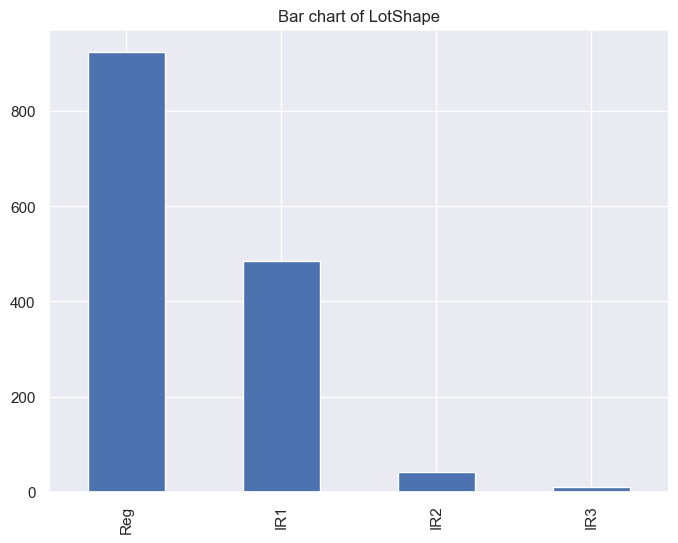

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Class count of Street:

Pave    1454
Grvl       6
Name: Street, dtype: int64


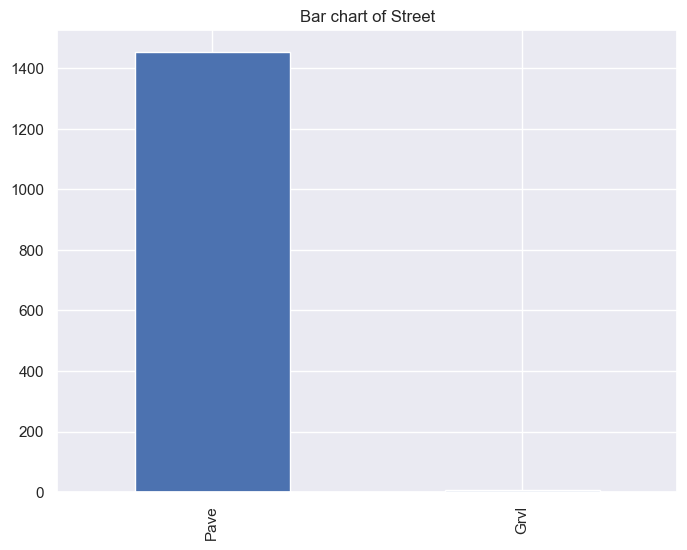

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Class count of HouseStyle:

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


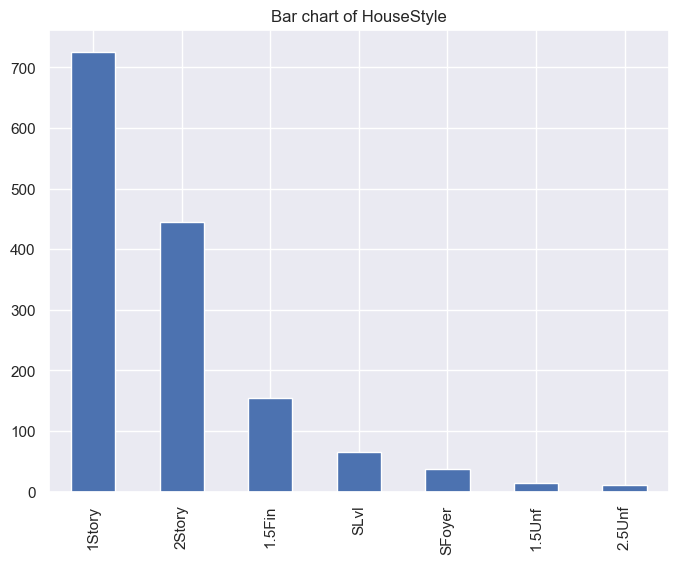

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Class count of FullBath:

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


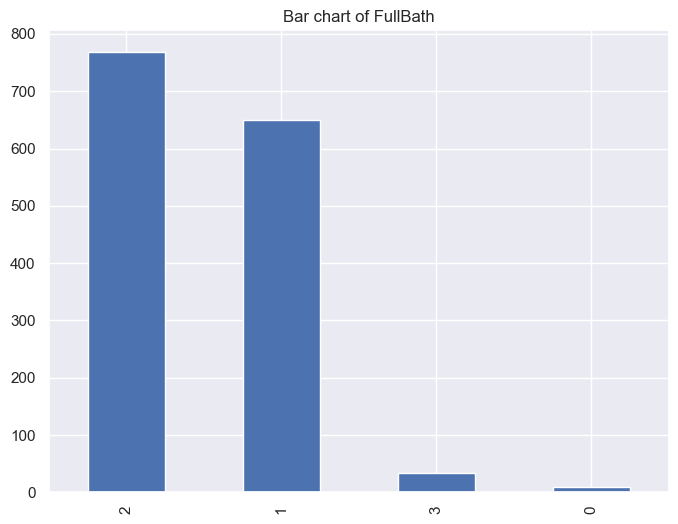

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Class count of BedroomAbvGr:

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


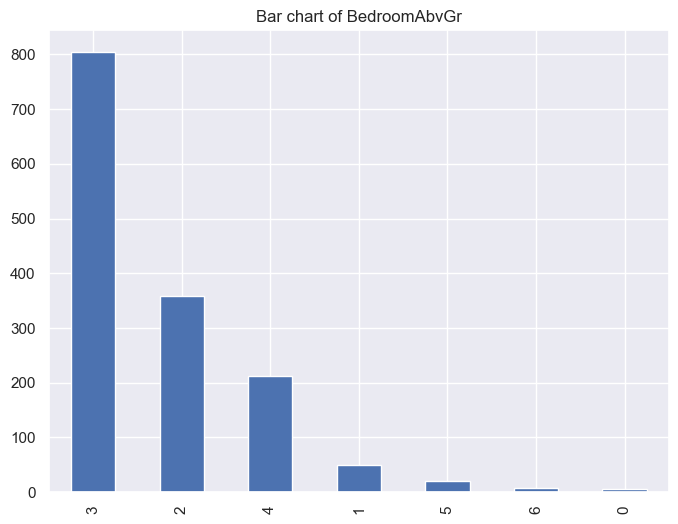

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Class count of TotRmsAbvGrd:

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


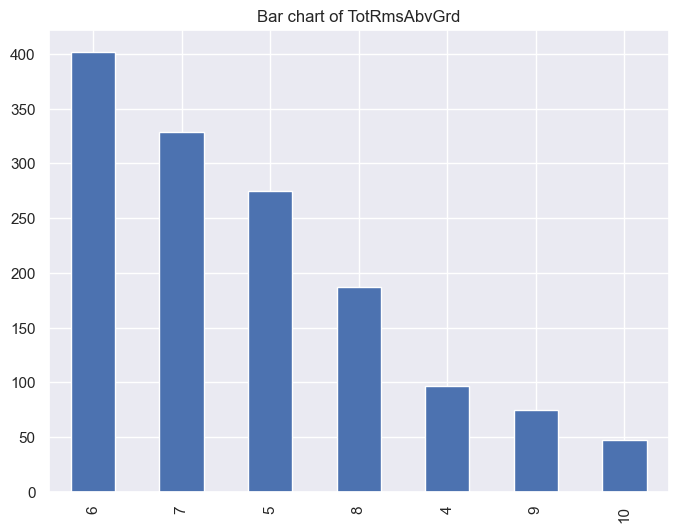

In [29]:
# Biến category
for col in cat_X:
    print('* '*40)
    _analyzer.analyze_category_variable(variable_name=col, df=selected_data)    

### Nhận xét về các biến định tính

**LotShape**:
- Hình dạng lô đất phổ biến nhất là Reg (Regular) với 925 trường hợp, chiếm đa số so với các loại hình không đều (IR1, IR2, IR3).

**Street**:
- Đường trải nhựa (Pave) chiếm ưu thế tuyệt đối với 1454 trường hợp, trong khi chỉ có 6 trường hợp đường trải sỏi (Grvl).

**HouseStyle**:
- Phong cách nhà 1 tầng (1Story) là phổ biến nhất với 726 trường hợp, tiếp theo là nhà 2 tầng (2Story) với 445 trường hợp. Các phong cách khác ít phổ biến hơn.

**FullBath**:
- Số lượng phòng tắm đầy đủ phổ biến nhất là 2 với 768 trường hợp, tiếp theo là 1 phòng tắm với 650 trường hợp. Rất ít nhà có 3 hoặc không có phòng tắm đầy đủ.

**BedroomAbvGr**:
- Số lượng phòng ngủ trên tầng chính phổ biến nhất là 3 phòng với 804 trường hợp, tiếp theo là 2 phòng với 358 trường hợp. Rất ít nhà có 5 hoặc nhiều hơn phòng ngủ.

**TotRmsAbvGrd**:
- Tổng số phòng trên tầng chính phổ biến nhất là 6 phòng với 402 trường hợp, tiếp theo là 7 và 5 phòng. Rất ít nhà có số phòng cao hơn, đặc biệt là nhà có 12 hoặc 14 phòng.

### Kết luận
Các giá trị phổ biến trong mỗi biến cho thấy xu hướng chung về hình dạng lô đất, loại đường, phong cách nhà, số lượng phòng tắm, phòng ngủ và tổng số phòng trên tầng chính trong tập dữ liệu nhà ở này.


* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of LotArea: {'mean': 10516.828082191782, 'median': 9478.5, 'mode': 7200, 'min': 1300, 'max': 215245, 'range': 213945}
=====
Dispersion of LotArea: 
 {'range': 213945, 'q1': 7553.5, 'q3': 11601.5, 'iqr': 4048.0, 'var': 99625649.65034176, 'skew': 12.207687851233496, 'kurtosis': 203.24327101886033}
=====


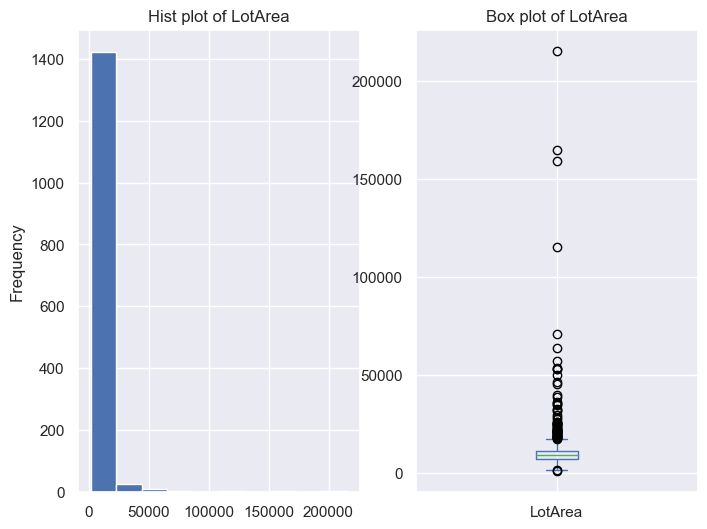

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of YearBuilt: {'mean': 1971.267808219178, 'median': 1973.0, 'mode': 2006, 'min': 1872, 'max': 2010, 'range': 138}
=====
Dispersion of YearBuilt: 
 {'range': 138, 'q1': 1954.0, 'q3': 2000.0, 'iqr': 46.0, 'var': 912.2154126019886, 'skew': -0.613461172488183, 'kurtosis': -0.43955194159361977}
=====


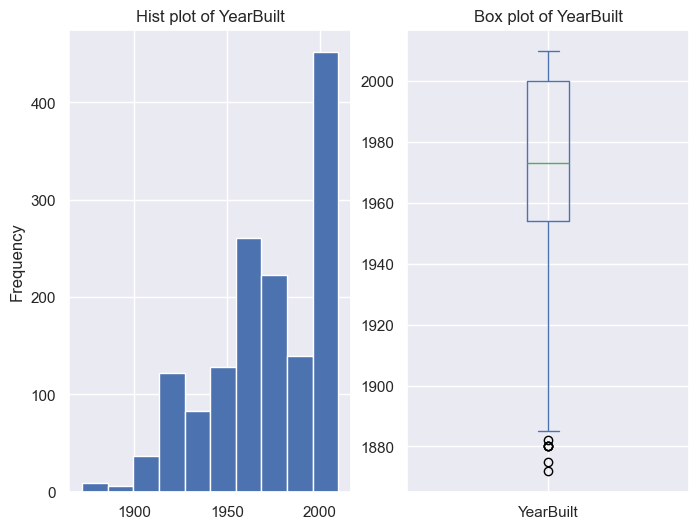

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of 1stFlrSF: {'mean': 1162.626712328767, 'median': 1087.0, 'mode': 864, 'min': 334, 'max': 4692, 'range': 4358}
=====
Dispersion of 1stFlrSF: 
 {'range': 4358, 'q1': 882.0, 'q3': 1391.25, 'iqr': 509.25, 'var': 149450.07920371433, 'skew': 1.3767566220336365, 'kurtosis': 5.74584148244079}
=====


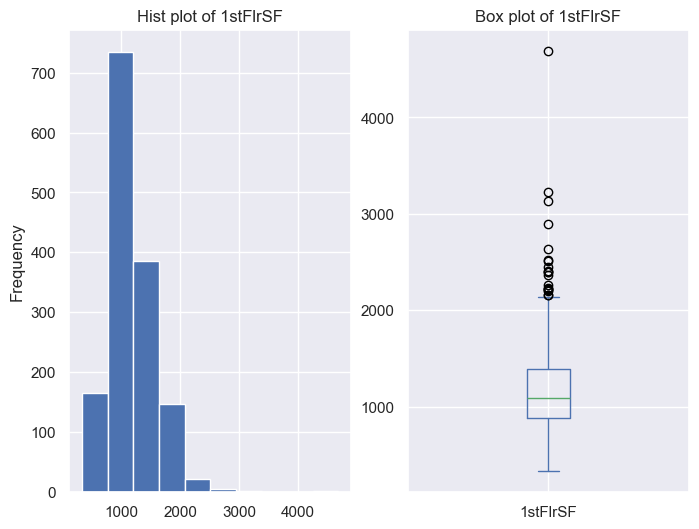

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of 2ndFlrSF: {'mean': 346.99246575342465, 'median': 0.0, 'mode': 0, 'min': 0, 'max': 2065, 'range': 2065}
=====
Dispersion of 2ndFlrSF: 
 {'range': 2065, 'q1': 0.0, 'q3': 728.0, 'iqr': 728.0, 'var': 190557.07533730177, 'skew': 0.8130298163023265, 'kurtosis': -0.5534635576075795}
=====


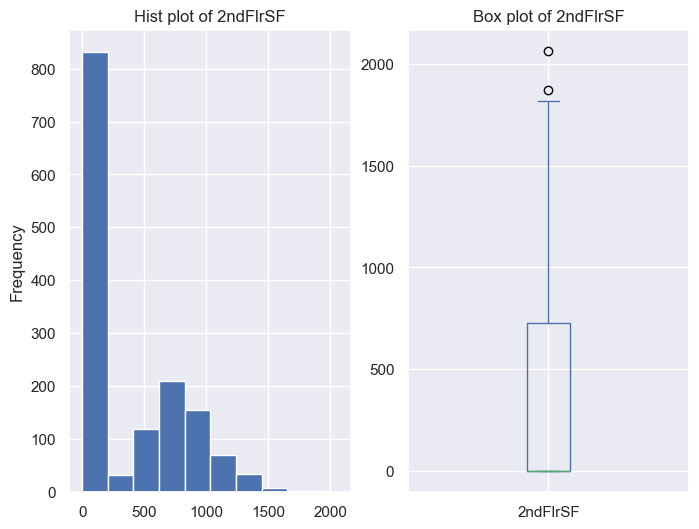

In [30]:
# Biến numeric
for col in num_X:
    print('* '*40)
    _analyzer.analyze_numeric_variable(variable_name=col, df=selected_data)

### Nhận xét về biến định lượng LotArea

**LotArea**:
- **Giá trị trung bình (mean)**: 10516.83
- **Trung vị (median)**: 9478.5
- **Mode (mode)**: 7200
- **Khoảng giá trị (range)**: Từ 1300 đến 215245 (tổng khoảng là 213945)
- **Tứ phân vị thứ nhất (q1)**: 7553.5
- **Tứ phân vị thứ ba (q3)**: 11601.5
- **Khoảng tứ phân vị (IQR)**: 4048.0
- **Phương sai (variance)**: 99625649.65
- **Độ lệch (skewness)**: 12.21
- **Độ nhọn (kurtosis)**: 203.24

<span style="font-size: 14px">*Nhận xét*:</span>
- <span style="font-size: 14px">**Trung bình cao hơn trung vị**: Giá trị trung bình (10516.83) cao hơn trung vị (9478.5), cho thấy phân phối của LotArea bị lệch phải. Điều này có nghĩa là có nhiều lô đất có diện tích nhỏ, nhưng có một số ít lô đất có diện tích rất lớn.</span>
- <span style="font-size: 14px">**Khoảng giá trị rộng**: LotArea có khoảng giá trị rất rộng, từ 1300 đến 215245, phản ánh sự đa dạng lớn về diện tích lô đất trong tập dữ liệu.</span>
- <span style="font-size: 14px">**Độ lệch cao**: Độ lệch (skewness) là 12.21, cho thấy sự phân bố không đồng đều với nhiều outliers ở phía bên phải của phân phối.</span>
- <span style="font-size: 14px">**Độ nhọn cao**: Độ nhọn (kurtosis) là 203.24, cho thấy phân phối của LotArea có đỉnh rất nhọn với nhiều outliers.</span>

<span style="font-size: 14px">*Outliers*:</span>

- <span style="font-size: 14px">**Hướng outliers**: Các outliers chủ yếu nằm ở phía trên của phân phối (các lô đất có diện tích lớn), do sự hiện diện của một số ít lô đất có diện tích rất lớn.</span>

### Kết luận
<span style="font-size: 14px">Phân phối của LotArea bị lệch phải với nhiều outliers lớn, cho thấy sự đa dạng và biến động lớn về diện tích lô đất trong tập dữ liệu.</span>


### Nhận xét về biến định lượng YearBuilt

**YearBuilt**:
- **Giá trị trung bình (mean)**: 1971.27
- **Trung vị (median)**: 1973.0
- **Mode (mode)**: 2006
- **Khoảng giá trị (range)**: Từ 1872 đến 2010 (tổng khoảng là 138)
- **Tứ phân vị thứ nhất (q1)**: 1954.0
- **Tứ phân vị thứ ba (q3)**: 2000.0
- **Khoảng tứ phân vị (IQR)**: 46.0
- **Phương sai (variance)**: 912.22
- **Độ lệch (skewness)**: -0.61
- **Độ nhọn (kurtosis)**: -0.44

<span style="font-size: 14px">*Nhận xét*:</span>
- <span style="font-size: 14px">**Trung bình gần bằng trung vị**: Giá trị trung bình (1971.27) rất gần với trung vị (1973.0), cho thấy phân phối của YearBuilt gần như đối xứng. Điều này chỉ ra rằng các năm xây dựng của các ngôi nhà trong tập dữ liệu phân bố khá đều.</span>
- <span style="font-size: 14px">**Khoảng giá trị hẹp**: YearBuilt có khoảng giá trị từ 1872 đến 2010, phản ánh sự đa dạng nhất định về tuổi của các ngôi nhà, nhưng không quá lớn.</span>
- <span style="font-size: 14px">**Độ lệch âm**: Độ lệch (skewness) là -0.61, cho thấy phân phối bị lệch trái nhẹ, có nghĩa là có một số ngôi nhà được xây dựng từ trước những năm 1950.</span>
- <span style="font-size: 14px">**Độ nhọn thấp**: Độ nhọn (kurtosis) là -0.44, cho thấy phân phối của YearBuilt có đỉnh phẳng hơn so với phân phối chuẩn.</span>

<span style="font-size: 14px">*Outliers*:</span>
- <span style="font-size: 14px">**Hướng outliers**: Các outliers chủ yếu nằm ở phía dưới của phân phối (các ngôi nhà được xây dựng rất sớm), do sự hiện diện của một số ít ngôi nhà có tuổi đời rất cao.</span>

### Kết luận
<span style="font-size: 14px">Phân phối của YearBuilt gần như đối xứng với một số outliers phía dưới, cho thấy sự đa dạng nhất định về tuổi của các ngôi nhà trong tập dữ liệu.</span>


### Nhận xét về biến định lượng 1stFlrSF

**1stFlrSF**:
- **Giá trị trung bình (mean)**: 1162.63
- **Trung vị (median)**: 1087.0
- **Mode (mode)**: 864
- **Khoảng giá trị (range)**: Từ 334 đến 4692 (tổng khoảng là 4358)
- **Tứ phân vị thứ nhất (q1)**: 882.0
- **Tứ phân vị thứ ba (q3)**: 1391.25
- **Khoảng tứ phân vị (IQR)**: 509.25
- **Phương sai (variance)**: 149450.08
- **Độ lệch (skewness)**: 1.38
- **Độ nhọn (kurtosis)**: 5.75

<span style="font-size: 14px">*Nhận xét*:</span>
- <span style="font-size: 14px">**Trung bình cao hơn trung vị**: Giá trị trung bình (1162.63) cao hơn trung vị (1087.0), cho thấy phân phối của 1stFlrSF bị lệch phải. Điều này có nghĩa là có nhiều ngôi nhà có diện tích tầng trệt nhỏ, nhưng có một số ít ngôi nhà có diện tích tầng trệt rất lớn.</span>
- <span style="font-size: 14px">**Khoảng giá trị rộng**: 1stFlrSF có khoảng giá trị từ 334 đến 4692, phản ánh sự đa dạng lớn về diện tích tầng trệt của các ngôi nhà trong tập dữ liệu.</span>
- <span style="font-size: 14px">**Độ lệch cao**: Độ lệch (skewness) là 1.38, cho thấy sự phân bố không đồng đều với nhiều outliers ở phía bên phải của phân phối.</span>
- <span style="font-size: 14px">**Độ nhọn cao**: Độ nhọn (kurtosis) là 5.75, cho thấy phân phối của 1stFlrSF có đỉnh rất nhọn với nhiều outliers.</span>

<span style="font-size: 14px">*Outliers*:</span>
- <span style="font-size: 14px">**Hướng outliers**: Các outliers chủ yếu nằm ở phía trên của phân phối (ngôi nhà có diện tích tầng trệt lớn), do sự hiện diện của một số ít ngôi nhà có diện tích tầng trệt rất lớn.</span>

### Kết luận
<span style="font-size: 14px">Phân phối của 1stFlrSF bị lệch phải với nhiều outliers lớn, cho thấy sự đa dạng và biến động lớn về diện tích tầng trệt của các ngôi nhà trong tập dữ liệu.</span>


### Nhận xét về biến định lượng 2ndFlrSF

**2ndFlrSF**:
- **Giá trị trung bình (mean)**: 346.99
- **Trung vị (median)**: 0.0
- **Mode (mode)**: 0
- **Khoảng giá trị (range)**: Từ 0 đến 2065 (tổng khoảng là 2065)
- **Tứ phân vị thứ nhất (q1)**: 0.0
- **Tứ phân vị thứ ba (q3)**: 728.0
- **Khoảng tứ phân vị (IQR)**: 728.0
- **Phương sai (variance)**: 190557.08
- **Độ lệch (skewness)**: 0.81
- **Độ nhọn (kurtosis)**: -0.55

<span style="font-size: 14px">*Nhận xét*:</span>
- <span style="font-size: 14px">**Trung bình cao hơn trung vị**: Giá trị trung bình (346.99) cao hơn trung vị (0.0), cho thấy phân phối của 2ndFlrSF bị lệch phải. Điều này có nghĩa là nhiều ngôi nhà không có tầng hai, nhưng có một số ít ngôi nhà có diện tích tầng hai rất lớn.</span>
- <span style="font-size: 14px">**Khoảng giá trị rộng**: 2ndFlrSF có khoảng giá trị từ 0 đến 2065, phản ánh sự đa dạng lớn về diện tích tầng hai của các ngôi nhà trong tập dữ liệu.</span>
- <span style="font-size: 14px">**Độ lệch nhẹ**: Độ lệch (skewness) là 0.81, cho thấy sự phân bố bị lệch phải nhưng không quá mạnh.</span>
- <span style="font-size: 14px">**Độ nhọn thấp**: Độ nhọn (kurtosis) là -0.55, cho thấy phân phối của 2ndFlrSF có đỉnh phẳng hơn so với phân phối chuẩn.</span>

<span style="font-size: 14px">*Outliers*:</span>
- <span style="font-size: 14px">**Hướng outliers**: Các outliers chủ yếu nằm ở phía trên của phân phối (ngôi nhà có diện tích tầng hai lớn), do sự hiện diện của một số ít ngôi nhà có diện tích tầng hai rất lớn.</span>

### Kết luận
<span style="font-size: 14px">Phân phối của 2ndFlrSF bị lệch phải với nhiều outliers lớn, cho thấy sự đa dạng và biến động lớn về diện tích tầng hai của các ngôi nhà trong tập dữ liệu.</span>


### 6. Phân tích 2 biến (cho nhận xét) 

### Biến numeric và numeric

In [31]:
import scipy.stats as stats

def analyze_continous_vs_continous(var_1, var_2, df):
    # Calculate Pearson correlation coefficient
    correlation_coefficient, p_value = stats.pearsonr(df[var_1], df[var_2])
    print('var 1=',var_1,',','var 2=',var_2)
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f} - P-value: {p_value:.4f}")
    sns.scatterplot(data=df, x=var_1, y=var_2)
    plt.show()

In [32]:
num_X # biến số liên tục: LotArea , YearBuilt ,1stFlrSF ,2ndFlrSF  

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF'], dtype='object')

# LotArea vs YearBuilt
var 1= LotArea , var 2= YearBuilt
Pearson Correlation Coefficient: 0.01 - P-value: 0.5870


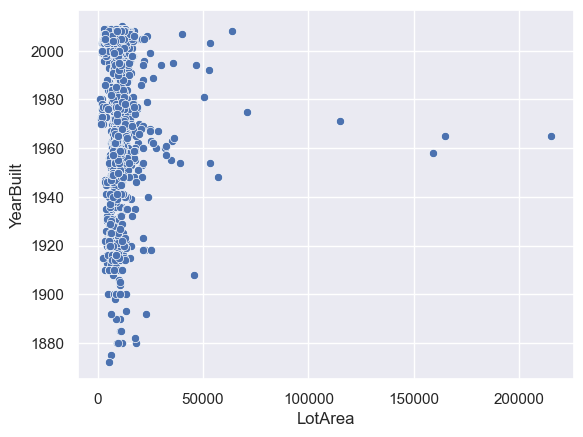

# LotArea vs 1stFlrSF
var 1= LotArea , var 2= 1stFlrSF
Pearson Correlation Coefficient: 0.30 - P-value: 0.0000


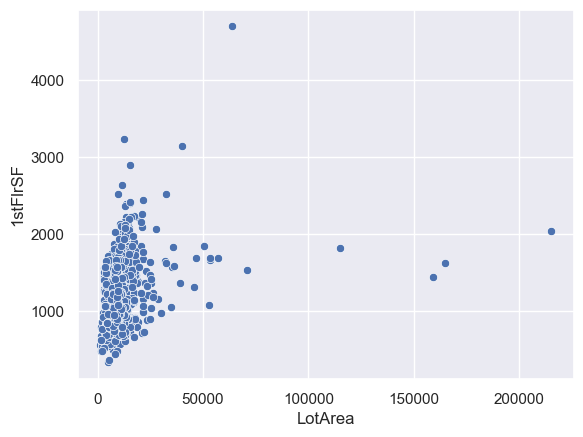

# LotArea vs 2ndFlrSF
var 1= LotArea , var 2= 2ndFlrSF
Pearson Correlation Coefficient: 0.05 - P-value: 0.0514


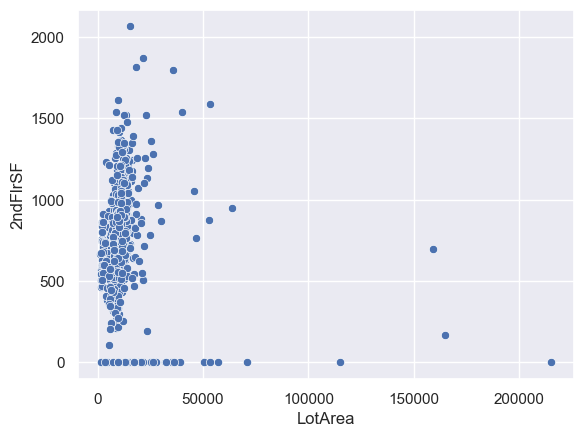

# YearBuilt vs 1stFlrSF
var 1= YearBuilt , var 2= 1stFlrSF
Pearson Correlation Coefficient: 0.28 - P-value: 0.0000


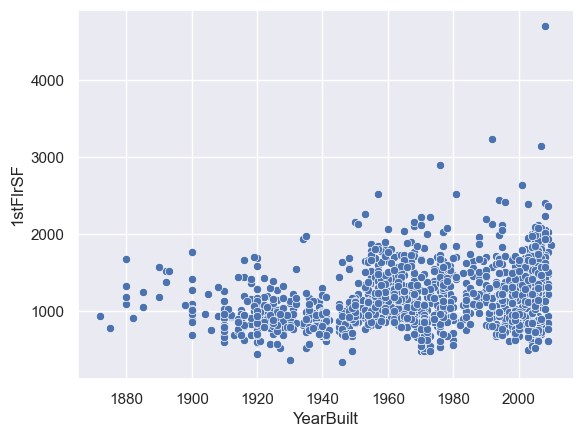

# YearBuilt vs 2ndFlrSF
var 1= YearBuilt , var 2= 2ndFlrSF
Pearson Correlation Coefficient: 0.01 - P-value: 0.6939


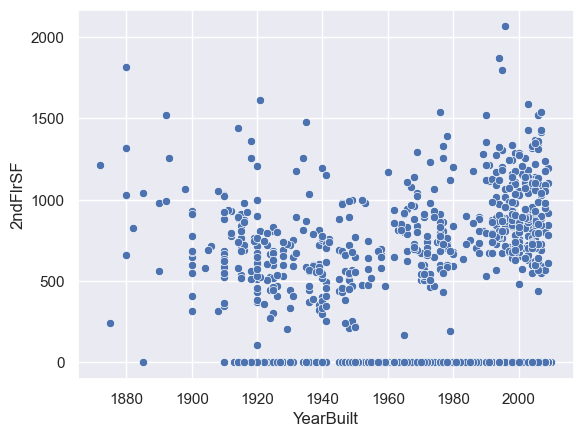

# 1stFlrSF vs 2ndFlrSF
var 1= 1stFlrSF , var 2= 2ndFlrSF
Pearson Correlation Coefficient: -0.20 - P-value: 0.0000


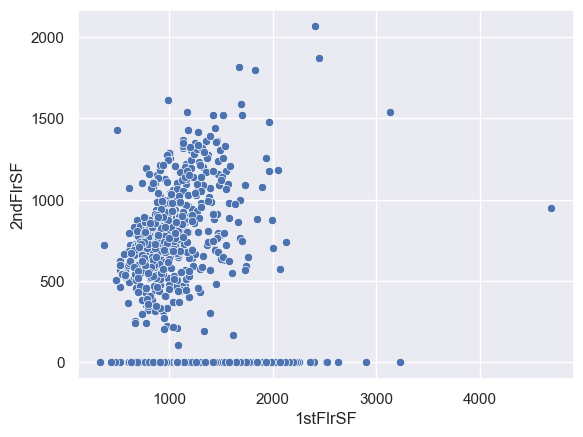

In [33]:
# category: FullBath , BedroomAbvGr , TotRmsAbvGrd, LotShape , Street  , HouseStyle  


# Tạo các cặp biến để phân tích và thêm tiêu đề cho mỗi cặp
for i in range(len(num_X)):
    for j in range(i + 1, len(num_X)):
        var_1 = num_X[i]
        var_2 = num_X[j]
        print(f"# {var_1} vs {var_2}")
        analyze_continous_vs_continous(var_1=var_1, var_2=var_2, df=selected_data)


### Nhận xét tương quan giữa các biến

#### LotArea vs YearBuilt
- <span style="font-size: 14px">*Nhận xét*: Mối tương quan rất yếu và không có ý nghĩa thống kê giữa diện tích lô đất và năm xây dựng (P-value > 0.05).</span>

#### LotArea vs 1stFlrSF
- <span style="font-size: 14px">*Nhận xét*: Có một mối tương quan dương vừa phải giữa diện tích lô đất và diện tích tầng trệt, và mối tương quan này có ý nghĩa thống kê (P-value < 0.05).</span>

#### LotArea vs 2ndFlrSF
- <span style="font-size: 14px">*Nhận xét*: Mối tương quan rất yếu và không có ý nghĩa thống kê giữa diện tích lô đất và diện tích tầng hai (P-value > 0.05).</span>

#### YearBuilt vs 1stFlrSF
- <span style="font-size: 14px">*Nhận xét*: Có một mối tương quan dương vừa phải giữa năm xây dựng và diện tích tầng trệt, và mối tương quan này có ý nghĩa thống kê (P-value < 0.05).</span>

#### YearBuilt vs 2ndFlrSF
- <span style="font-size: 14px">*Nhận xét*: Mối tương quan rất yếu và không có ý nghĩa thống kê giữa năm xây dựng và diện tích tầng hai (P-value > 0.05).</span>

#### 1stFlrSF vs 2ndFlrSF
- <span style="font-size: 14px">*Nhận xét*: Có một mối tương quan nghịch yếu giữa diện tích tầng trệt và diện tích tầng hai, và mối tương quan này có ý nghĩa thống kê (P-value < 0.05).</span>

### Kết luận
<span style="font-size: 14px">Phân tích tương quan cho thấy chỉ có các cặp biến "LotArea vs 1stFlrSF" và "YearBuilt vs 1stFlrSF" có mối tương quan dương vừa phải và có ý nghĩa thống kê. Các cặp biến khác có mối tương quan rất yếu hoặc không có ý nghĩa thống kê.</span>


### Biến category và category

In [34]:
cat_X # category: FullBath , BedroomAbvGr , TotRmsAbvGrd, LotShape , Street  , HouseStyle  


Index(['LotShape', 'Street', 'HouseStyle', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd'],
      dtype='object')

In [35]:
n = len(cat_X)
dependent_pairs = []
independent_pairs = []
dependent_count = 0
independent_count = 0

for i in range(n):
    for j in range(i+1, n):
        print('* ' * 20)
        print('var1=', cat_X[i], ',', 'var2=', cat_X[j])
        twoway_table = _analyzer.create_tw_table(var1=cat_X[i], var2=cat_X[j], df=selected_data)
        result = _analyzer.use_chi_2_evaluation(twoway_table)
        print(result)
        
        if "Fail to reject H0" in result:
            independent_pairs.append((cat_X[i], cat_X[j]))
            independent_count += 1
        else:
            dependent_pairs.append((cat_X[i], cat_X[j]))
            dependent_count += 1




* * * * * * * * * * * * * * * * * * * * 
var1= LotShape , var2= Street
Fail to reject H0 - Independent
* * * * * * * * * * * * * * * * * * * * 
var1= LotShape , var2= HouseStyle
Reject H0 - Dependent
* * * * * * * * * * * * * * * * * * * * 
var1= LotShape , var2= FullBath
Reject H0 - Dependent
* * * * * * * * * * * * * * * * * * * * 
var1= LotShape , var2= BedroomAbvGr
Fail to reject H0 - Independent
* * * * * * * * * * * * * * * * * * * * 
var1= LotShape , var2= TotRmsAbvGrd
Reject H0 - Dependent
* * * * * * * * * * * * * * * * * * * * 
var1= Street , var2= HouseStyle
Fail to reject H0 - Independent
* * * * * * * * * * * * * * * * * * * * 
var1= Street , var2= FullBath
Fail to reject H0 - Independent
* * * * * * * * * * * * * * * * * * * * 
var1= Street , var2= BedroomAbvGr
Fail to reject H0 - Independent
* * * * * * * * * * * * * * * * * * * * 
var1= Street , var2= TotRmsAbvGrd
Fail to reject H0 - Independent
* * * * * * * * * * * * * * * * * * * * 
var1= HouseStyle , var2= FullBath


In [36]:
print('* ' * 20)
print(f'Total independent pairs: {independent_count}')
print(f'Total dependent pairs: {dependent_count}')
print('\nIndependent pairs:')
for pair in independent_pairs:
    print(pair)
print('\nDependent pairs:')
for pair in dependent_pairs:
    print(pair)

* * * * * * * * * * * * * * * * * * * * 
Total independent pairs: 6
Total dependent pairs: 9

Independent pairs:
('LotShape', 'Street')
('LotShape', 'BedroomAbvGr')
('Street', 'HouseStyle')
('Street', 'FullBath')
('Street', 'BedroomAbvGr')
('Street', 'TotRmsAbvGrd')

Dependent pairs:
('LotShape', 'HouseStyle')
('LotShape', 'FullBath')
('LotShape', 'TotRmsAbvGrd')
('HouseStyle', 'FullBath')
('HouseStyle', 'BedroomAbvGr')
('HouseStyle', 'TotRmsAbvGrd')
('FullBath', 'BedroomAbvGr')
('FullBath', 'TotRmsAbvGrd')
('BedroomAbvGr', 'TotRmsAbvGrd')


### Nhận xét về tương quan giữa các biến phân loại

**Tổng số cặp biến độc lập**: 6

**Tổng số cặp biến phụ thuộc**: 9

**Cặp biến độc lập**:
- ('LotShape', 'Street')
- ('LotShape', 'BedroomAbvGr')
- ('Street', 'HouseStyle')
- ('Street', 'FullBath')
- ('Street', 'BedroomAbvGr')
- ('Street', 'TotRmsAbvGrd')

**Cặp biến phụ thuộc**:
- ('LotShape', 'HouseStyle')
- ('LotShape', 'FullBath')
- ('LotShape', 'TotRmsAbvGrd')
- ('HouseStyle', 'FullBath')
- ('HouseStyle', 'BedroomAbvGr')
- ('HouseStyle', 'TotRmsAbvGrd')
- ('FullBath', 'BedroomAbvGr')
- ('FullBath', 'TotRmsAbvGrd')
- ('BedroomAbvGr', 'TotRmsAbvGrd')

### Kết luận
Trong số các biến phân loại, chúng ta có 6 cặp biến độc lập và 9 cặp biến phụ thuộc. Các cặp biến độc lập không cho thấy mối quan hệ đáng kể, trong khi các cặp biến phụ thuộc cho thấy mối tương quan mạnh hơn, có ý nghĩa thống kê.




In [37]:
num_X, cat_X

(Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF'], dtype='object'),
 Index(['LotShape', 'Street', 'HouseStyle', 'FullBath', 'BedroomAbvGr',
        'TotRmsAbvGrd'],
       dtype='object'))

### Biến categoy và numeric

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                             sum_sq      df           F        PR(>F)
C(LotShape)            1.660843e+10     3.0   79.411344  1.861984e-33
C(Street)              5.146686e+09     1.0   73.824898  2.167345e-17
C(LotShape):C(Street)  2.733743e+10     3.0  130.710850  5.821572e-75
Residual               1.012956e+11  1453.0         NaN           NaN


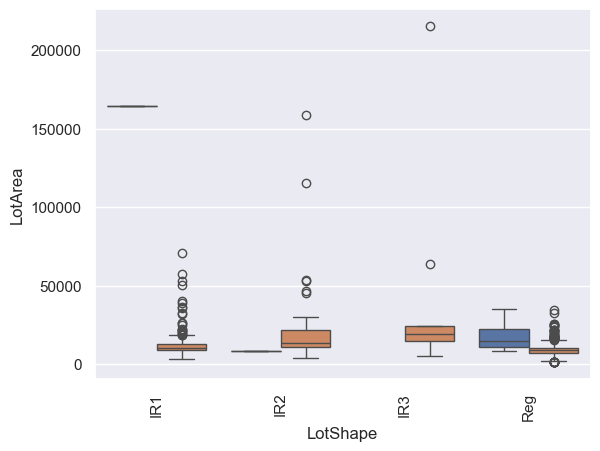

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df             F        PR(>F)
C(LotShape)                1.305741e+00     3.0  5.401145e-09  9.999414e-01
C(HouseStyle)              1.144841e+09     7.0  2.029539e+00  1.317723e-01
C(LotShape):C(HouseStyle)  2.984096e+10    21.0  1.763371e+01  8.082543e-36
Residual                   1.158801e+11  1438.0           NaN           NaN


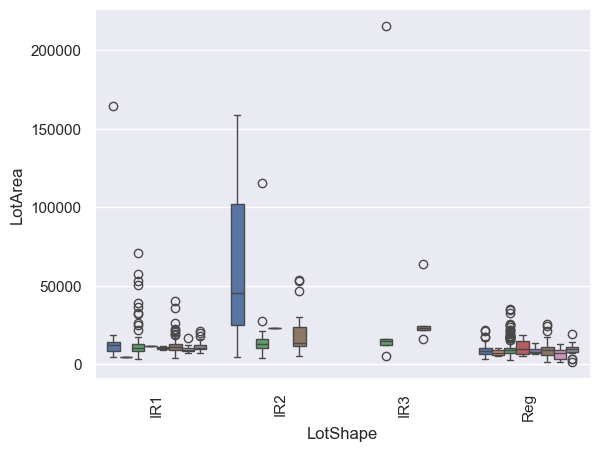

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                               sum_sq      df          F        PR(>F)
C(LotShape)              8.388548e+09     3.0  33.549188  5.721312e-15
C(FullBath)              2.665978e+09     3.0  10.662323  2.530470e-05
C(LotShape):C(FullBath)  1.780664e+10     9.0  23.738639  1.833599e-34
Residual                 1.206013e+11  1447.0        NaN           NaN


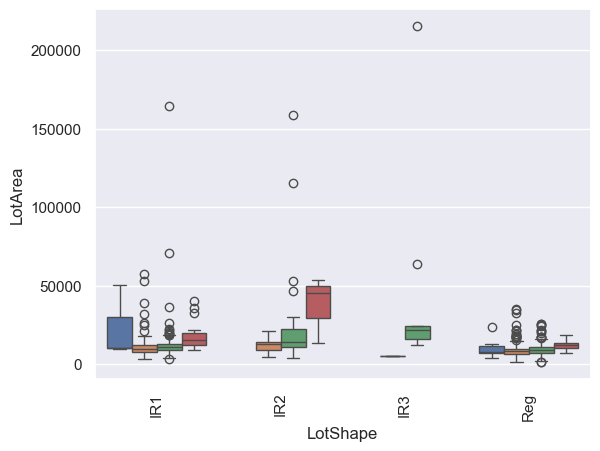

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F        PR(>F)
C(LotShape)                 -7.493503e-01     3.0 -3.122935e-09  1.000000e+00
C(BedroomAbvGr)              9.332439e+08     7.0  1.666850e+00  1.892059e-01
C(LotShape):C(BedroomAbvGr)  2.904831e+10    21.0  1.729422e+01  1.756371e-42
Residual                     1.149364e+11  1437.0           NaN           NaN


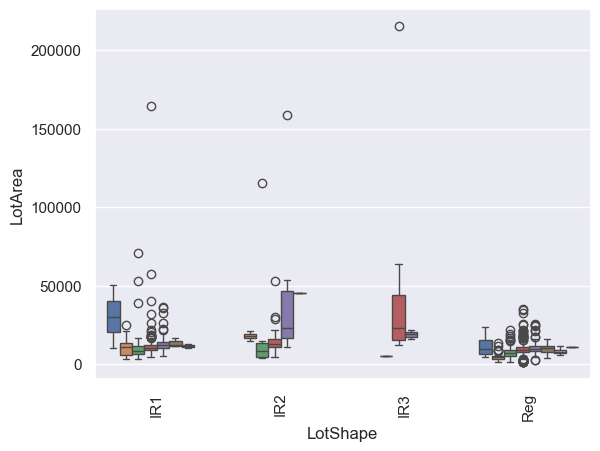

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F         PR(>F)
C(LotShape)                  5.309613e-03     3.0  3.054219e-11   9.999956e-01
C(TotRmsAbvGrd)              1.485850e+10    11.0  2.330993e+01   2.246270e-26
C(LotShape):C(TotRmsAbvGrd)  6.766579e+10    33.0  3.538456e+01  3.345052e-130
Residual                     8.251853e+10  1424.0           NaN            NaN


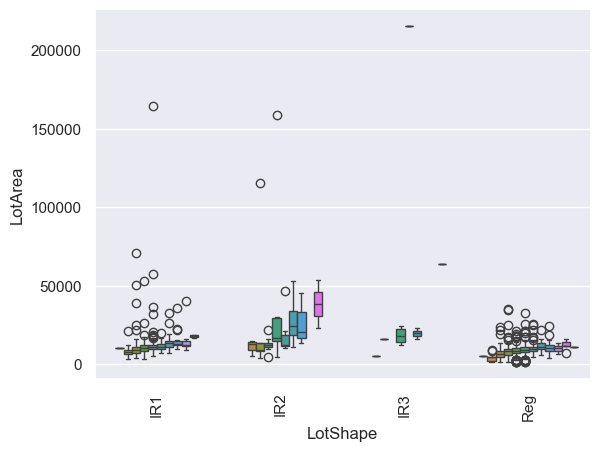

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                               sum_sq      df          F        PR(>F)
C(Street)                5.816982e+09     1.0  69.750849  1.553607e-16
C(HouseStyle)            1.679145e+09     7.0   2.876352  5.666170e-02
C(Street):C(HouseStyle)  1.838389e+10     7.0  31.491334  7.663167e-41
Residual                 1.208416e+11  1449.0        NaN           NaN


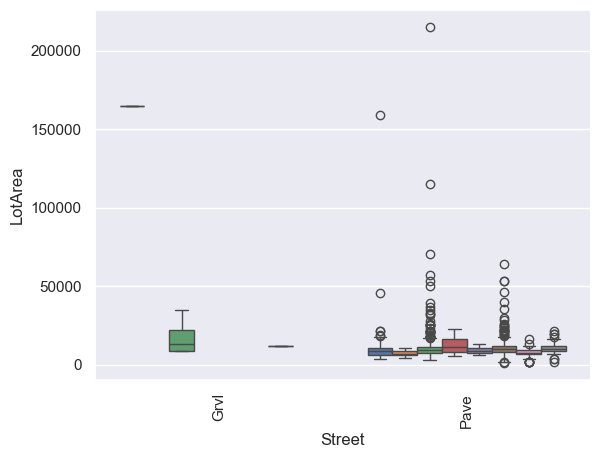

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                             sum_sq      df           F        PR(>F)
C(Street)              3.157542e+08     1.0    3.883945  4.893933e-02
C(FullBath)            2.328165e+09     3.0    9.545889  7.607730e-05
C(Street):C(FullBath)  2.768948e+10     3.0  113.531744  4.726297e-66
Residual               1.182063e+11  1454.0         NaN           NaN


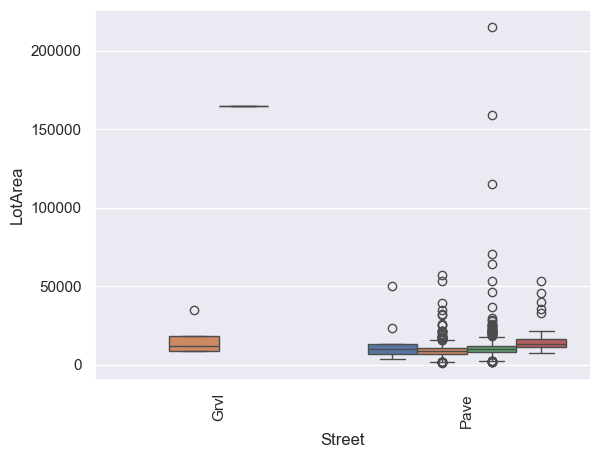

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df          F        PR(>F)
C(Street)                  5.138377e+09     1.0  56.872527  8.161673e-14
C(BedroomAbvGr)            1.461982e+09     7.0   2.311643  3.167759e-02
C(Street):C(BedroomAbvGr)  1.518827e+10     7.0  24.015236  4.445171e-31
Residual                   1.310061e+11  1450.0        NaN           NaN


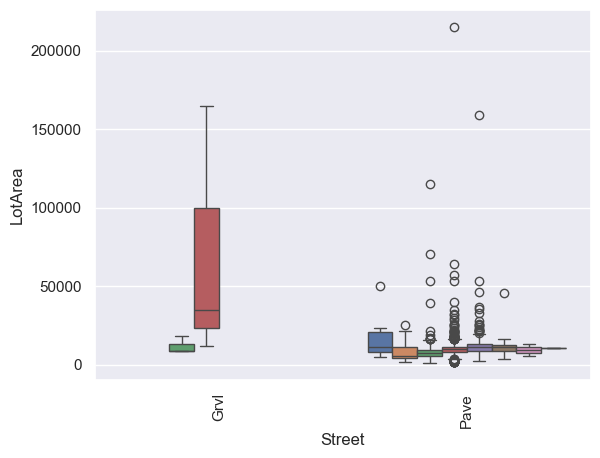

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df          F        PR(>F)
C(Street)                  2.864753e+09     1.0  35.902668  2.615013e-09
C(TotRmsAbvGrd)            1.573175e+09    11.0   1.792354  5.732829e-02
C(Street):C(TotRmsAbvGrd)  3.079736e+10    11.0  35.088133  6.977755e-67
Residual                   1.152199e+11  1444.0        NaN           NaN


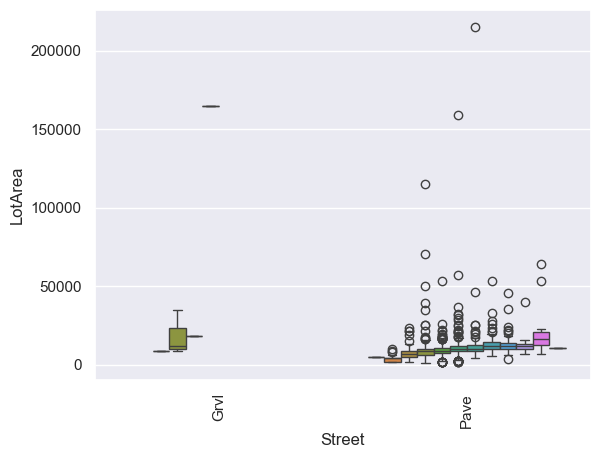

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df          F    PR(>F)
C(HouseStyle)              4.841873e+08     7.0   0.713176  0.582915
C(FullBath)                6.782502e+09     3.0  23.310431  0.000002
C(HouseStyle):C(FullBath)  2.979335e+09    21.0   1.462789  0.089582
Residual                   1.391779e+11  1435.0        NaN       NaN


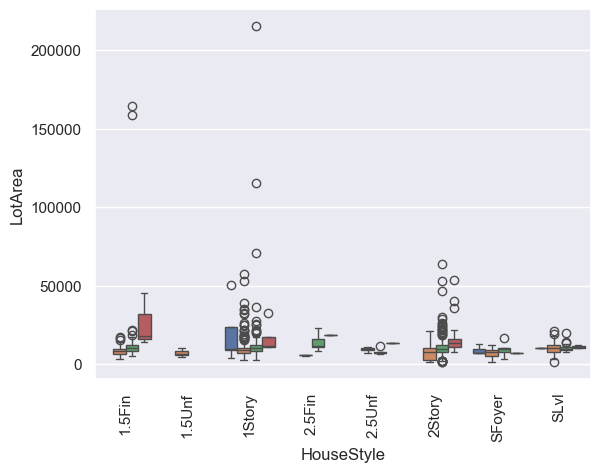

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                     sum_sq      df             F    PR(>F)
C(HouseStyle)                  1.224391e-01     7.0  1.786342e-10  0.999989
C(BedroomAbvGr)               -1.306118e+00     7.0 -1.905578e-09  1.000000
C(HouseStyle):C(BedroomAbvGr)  3.591873e+09    49.0  7.486303e-01  0.839758
Residual                       1.391399e+11  1421.0           NaN       NaN


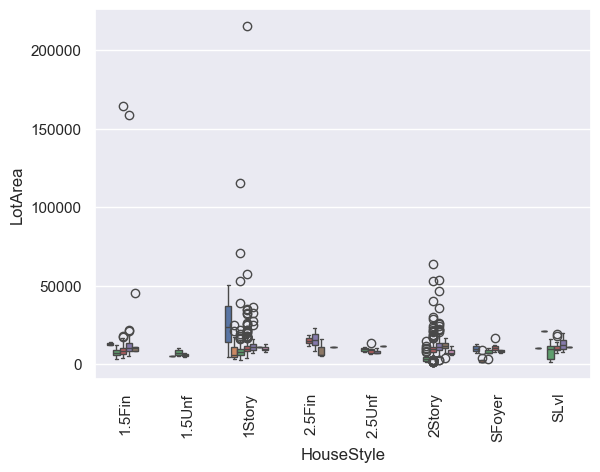

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                     sum_sq      df             F    PR(>F)
C(HouseStyle)                  8.067766e-03     7.0  1.205216e-11  0.999997
C(TotRmsAbvGrd)                8.248489e+09    11.0  7.841361e+00  0.000411
C(HouseStyle):C(TotRmsAbvGrd)  6.306101e+09    77.0  8.564065e-01  0.741166
Residual                       1.341677e+11  1403.0           NaN       NaN


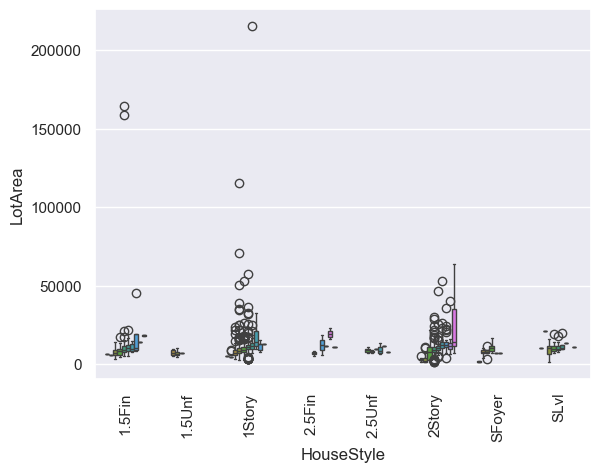

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F    PR(>F)
C(FullBath)                  2.023370e-04     3.0  6.972908e-13  0.999999
C(BedroomAbvGr)              2.293502e-01     7.0  3.387358e-10  1.000000
C(FullBath):C(BedroomAbvGr)  2.140442e+08    21.0  1.053766e-01  0.899992
Residual                     1.393811e+11  1441.0           NaN       NaN


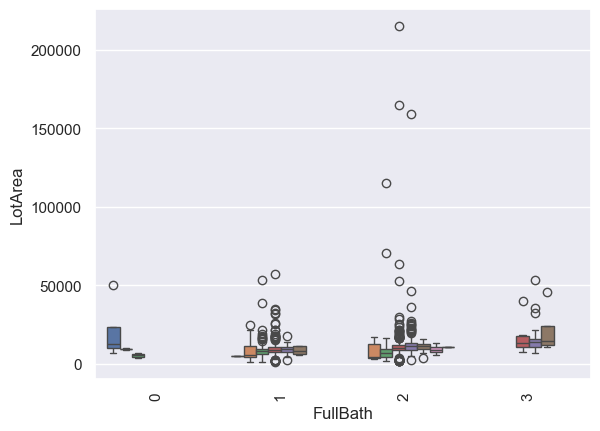

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F        PR(>F)
C(FullBath)                  1.927449e-03     3.0  6.769687e-12  9.999979e-01
C(TotRmsAbvGrd)              9.920190e+09    11.0  9.502420e+00  1.417000e-11
C(FullBath):C(TotRmsAbvGrd)  1.441248e+10    33.0  4.601842e+00  6.697594e-13
Residual                     1.356205e+11  1429.0           NaN           NaN


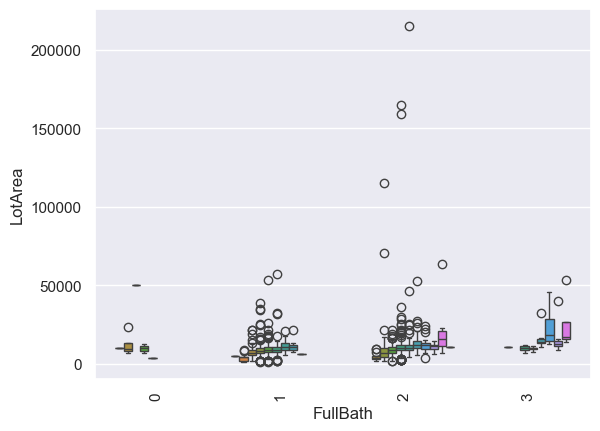

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                       sum_sq      df             F   PR(>F)
C(BedroomAbvGr)                           NaN     7.0           NaN      NaN
C(TotRmsAbvGrd)                  1.625760e+00    11.0  1.544363e-09  1.00000
C(BedroomAbvGr):C(TotRmsAbvGrd)  3.064082e+08    77.0  4.158103e-02  0.83845
Residual                         1.352248e+11  1413.0           NaN      NaN


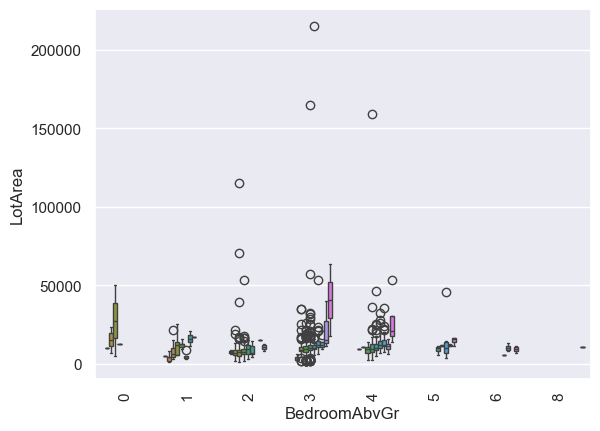

In [38]:
# biến LotArea
n = len(cat_X)
for i in range(n):
    for j in range(i+1, n):
        print('* '*40)
        _analyzer.analyze_continous_vs_categories(continous_var='LotArea', category_vars=[cat_X[i],cat_X[j]], 
                                                  df=selected_data)

<span style="font-size: 12px">

# Nhận định kết quả phân tích ANOVA với LotArea

Dựa vào cột PR(>F) và ngưỡng 0.05, ta có thể tóm tắt ảnh hưởng của các yếu tố như sau:

## Các yếu tố và tương tác có ảnh hưởng đáng kể (PR(>F) < 0.05):
- **LotShape**: Ảnh hưởng mạnh trong bảng đầu tiên và tương tác với Street, FullBath, BedroomAbvGr, TotRmsAbvGrd.
- **Street**: Ảnh hưởng trong bảng đầu tiên và tương tác với LotShape, HouseStyle, FullBath, BedroomAbvGr, TotRmsAbvGrd.
- **FullBath**: Ảnh hưởng trong bảng thứ ba, thứ bảy và tương tác với LotShape, Street.
- **TotRmsAbvGrd**: Ảnh hưởng trong bảng thứ năm, thứ chín, thứ mười lăm và tương tác với LotShape, Street, FullBath.
- Tương tác **LotShape:HouseStyle**: Ảnh hưởng trong bảng thứ hai.

## Các yếu tố và tương tác không ảnh hưởng đáng kể (PR(>F) >= 0.05):
- **HouseStyle**: Ảnh hưởng riêng lẻ không đáng kể trong hầu hết các bảng.
- **BedroomAbvGr**: Ảnh hưởng riêng lẻ không đáng kể trong hầu hết các bảng.
- Các tương tác bậc cao phức tạp như HouseStyle:FullBath, HouseStyle:BedroomAbvGr, HouseStyle:TotRmsAbvGrd, FullBath:BedroomAbvGr, BedroomAbvGr:TotRmsAbvGrd.
- **LotShape** riêng lẻ trong hầu hết các bảng (trừ bảng đầu tiên).

## Tóm lại:
- LotShape và Street, cả riêng lẻ và trong tương tác với nhau và với các yếu tố khác (FullBath, TotRmsAbvGrd), thể hiện ảnh hưởng mạnh mẽ nhất.
- FullBath và TotRmsAbvGrd cũng có ảnh hưởng đáng kể, đặc biệt trong tương tác.
- Ngược lại, HouseStyle và BedroomAbvGr ít ảnh hưởng hơn, chủ yếu thông qua tương tác với các yếu tố khác.
- Các tương tác bậc cao phức tạp hơn không cho thấy ảnh hưởng đáng kể.

</span>


* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                             sum_sq      df          F        PR(>F)
C(LotShape)            1.112929e+05     3.0  42.940493  7.612226e-19
C(Street)              6.245034e+02     1.0   0.722863  3.953466e-01
C(LotShape):C(Street)  8.405772e+02     3.0   0.324323  8.077904e-01
Residual               1.255292e+06  1453.0        NaN           NaN


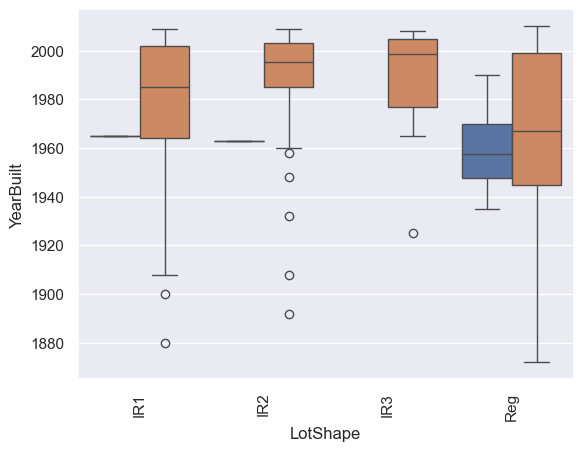

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                  sum_sq      df             F        PR(>F)
C(LotShape)                     0.000428     3.0  2.125646e-07  9.996322e-01
C(HouseStyle)              137685.132937     7.0  2.933478e+01  3.259091e-13
C(LotShape):C(HouseStyle)   20954.913122    21.0  1.488197e+00  1.215831e-01
Residual                   964195.262108  1438.0           NaN           NaN


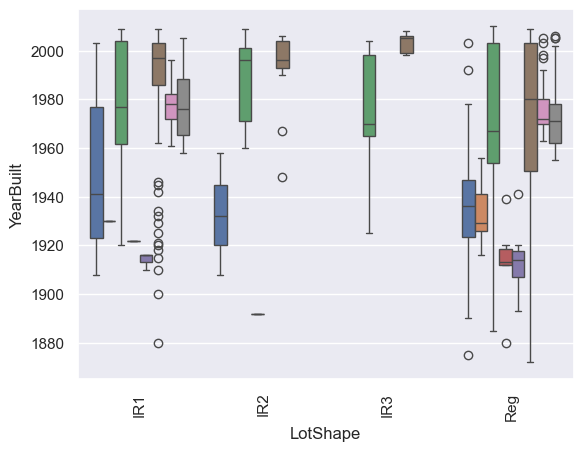

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                sum_sq      df          F        PR(>F)
C(LotShape)               44954.586691     3.0  22.842201  1.710559e-10
C(FullBath)               26328.194068     3.0  13.377810  1.750458e-06
C(LotShape):C(FullBath)    8733.337783     9.0   1.479187  1.598954e-01
Residual                 949255.954006  1447.0        NaN           NaN


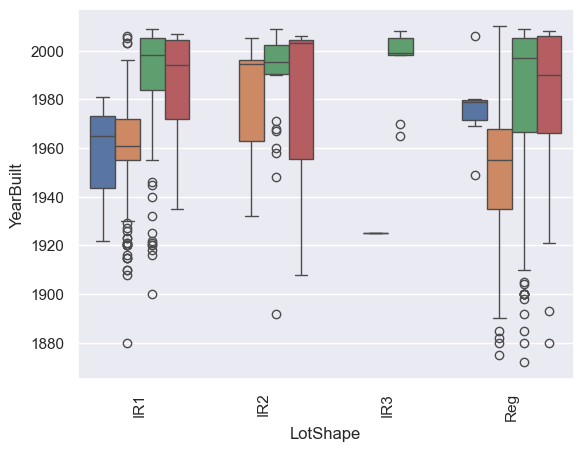

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F        PR(>F)
C(LotShape)                 -1.168979e-05     3.0 -4.700357e-09  1.000000e+00
C(BedroomAbvGr)              1.032452e+05     7.0  1.779170e+01  2.329593e-08
C(LotShape):C(BedroomAbvGr)  3.134396e+04    21.0  1.800445e+00  2.975667e-02
Residual                     1.191273e+06  1437.0           NaN           NaN


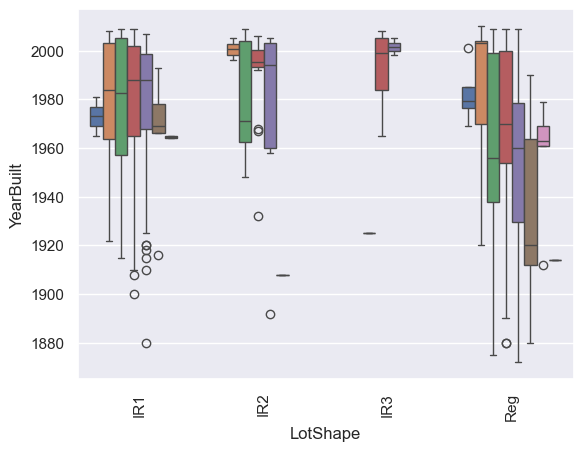

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F    PR(>F)
C(LotShape)                  1.848930e-06     3.0  7.280745e-10  0.999978
C(TotRmsAbvGrd)              1.796770e+08    11.0  1.929641e+04  0.000000
C(LotShape):C(TotRmsAbvGrd)  8.378382e+04    33.0  2.999320e+00  0.000001
Residual                     1.205406e+06  1424.0           NaN       NaN


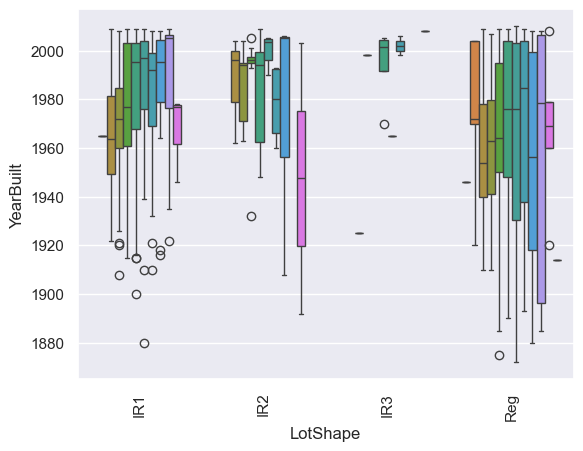

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                               sum_sq      df          F        PR(>F)
C(Street)                9.820415e+02     1.0   1.402300  2.365330e-01
C(HouseStyle)            8.517922e+04     7.0  17.375879  3.489975e-08
C(Street):C(HouseStyle)  2.912451e+05     7.0  59.411660  4.114870e-75
Residual                 1.014746e+06  1449.0        NaN           NaN


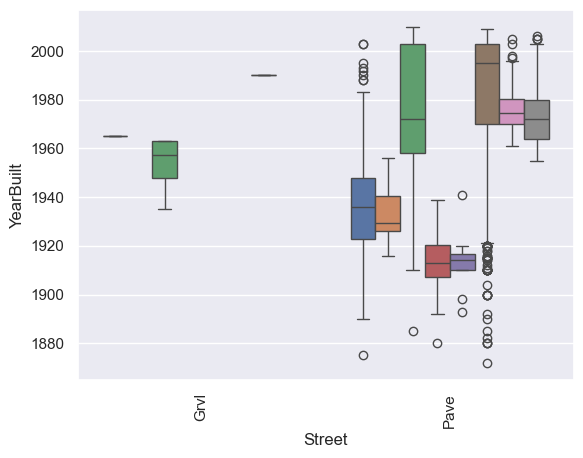

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                             sum_sq      df             F         PR(>F)
C(Street)              1.382166e+07     1.0  20374.445138   0.000000e+00
C(FullBath)            2.390811e+06     3.0   1174.761367  2.449569e-304
C(Street):C(FullBath)  4.455896e+06     3.0   2189.471659   0.000000e+00
Residual               9.863677e+05  1454.0           NaN            NaN


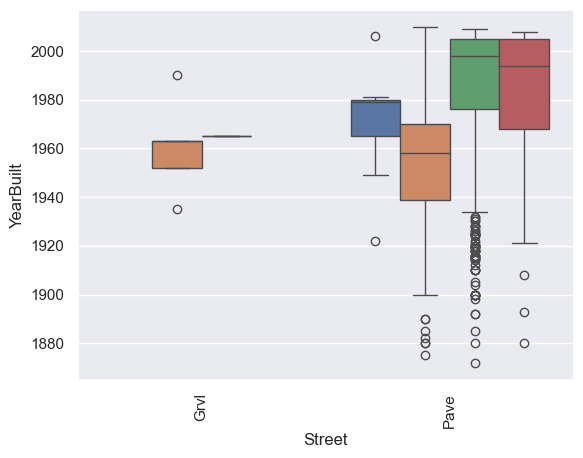

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df              F        PR(>F)
C(Street)                  1.067102e+08     1.0  121403.919756  0.000000e+00
C(BedroomAbvGr)            6.438107e+05     7.0     104.637385  1.997771e-94
C(Street):C(BedroomAbvGr)  5.301373e+06     7.0     861.622593  0.000000e+00
Residual                   1.274504e+06  1450.0            NaN           NaN


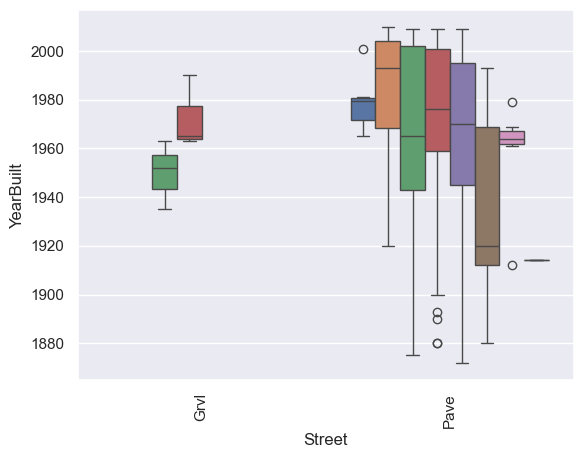

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df             F         PR(>F)
C(Street)                  3.956316e+07     1.0  44251.674150   0.000000e+00
C(TotRmsAbvGrd)            7.466450e+05    11.0     75.920712  5.436378e-125
C(Street):C(TotRmsAbvGrd)  5.066850e+06    11.0    515.209849   0.000000e+00
Residual                   1.291006e+06  1444.0           NaN            NaN


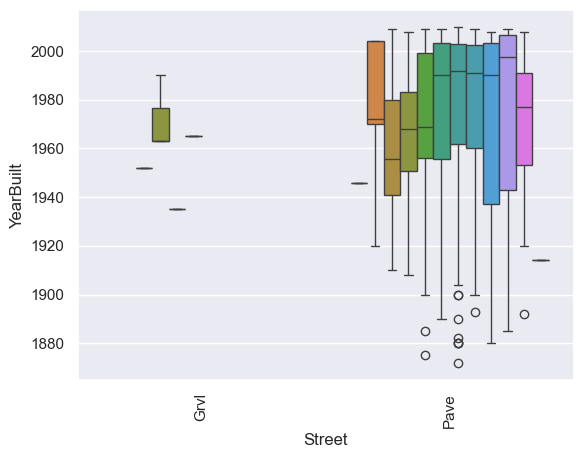

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df           F        PR(>F)
C(HouseStyle)              2.018422e+05     7.0   59.228467  2.492956e-46
C(FullBath)                6.258428e+04     3.0   42.850962  8.202360e-11
C(HouseStyle):C(FullBath)  2.046301e+06    21.0  200.155136  0.000000e+00
Residual                   6.986108e+05  1435.0         NaN           NaN


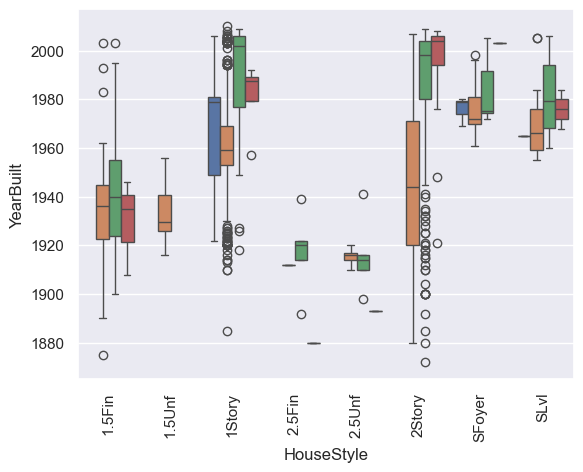

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                     sum_sq      df             F  \
C(HouseStyle)                  3.048533e-07     7.0  6.454171e-11   
C(BedroomAbvGr)               -6.655324e-03     7.0 -1.409025e-06   
C(HouseStyle):C(BedroomAbvGr)  2.534459e+06    49.0  7.665435e+01   
Residual                       9.588408e+05  1421.0           NaN   

                                      PR(>F)  
C(HouseStyle)                   9.999936e-01  
C(BedroomAbvGr)                 1.000000e+00  
C(HouseStyle):C(BedroomAbvGr)  4.435504e-277  
Residual                                 NaN  


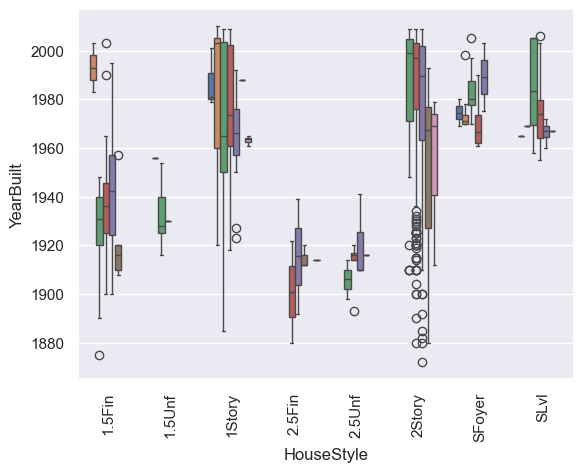

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                     sum_sq      df             F  \
C(HouseStyle)                 -1.740965e-06     7.0 -3.810370e-10   
C(TotRmsAbvGrd)                6.485627e+08    11.0  9.033052e+04   
C(HouseStyle):C(TotRmsAbvGrd)  6.136793e+05    77.0  1.221029e+01   
Residual                       9.157617e+05  1403.0           NaN   

                                     PR(>F)  
C(HouseStyle)                  1.000000e+00  
C(TotRmsAbvGrd)                0.000000e+00  
C(HouseStyle):C(TotRmsAbvGrd)  1.607297e-73  
Residual                                NaN  


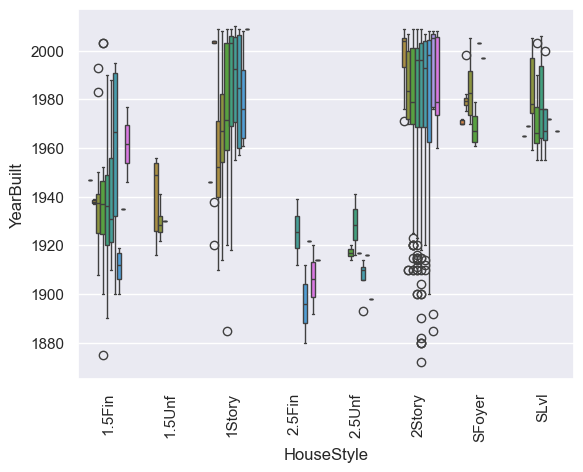

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F    PR(>F)
C(FullBath)                 -1.272232e-06     3.0 -7.380093e-10  1.000000
C(BedroomAbvGr)              1.858089e-07     7.0  4.619396e-11  1.000000
C(FullBath):C(BedroomAbvGr)  2.402479e+03    21.0  1.990935e-01  0.819496
Residual                     8.280323e+05  1441.0           NaN       NaN


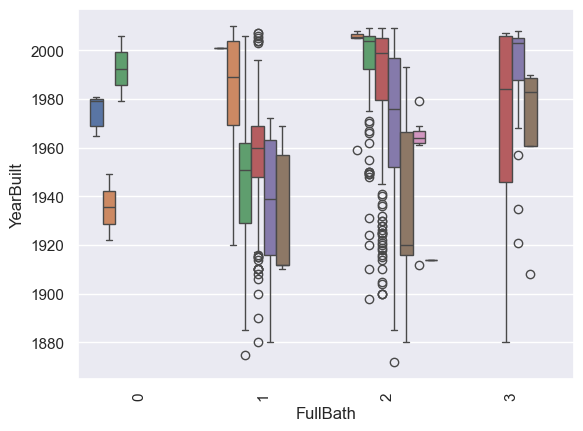

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F    PR(>F)
C(FullBath)                  5.451181e-05     3.0  2.855178e-08  0.999865
C(TotRmsAbvGrd)              2.899517e+08    11.0  4.141874e+04  0.000000
C(FullBath):C(TotRmsAbvGrd)  2.542184e+07    33.0  1.210478e+03  0.000000
Residual                     9.094282e+05  1429.0           NaN       NaN


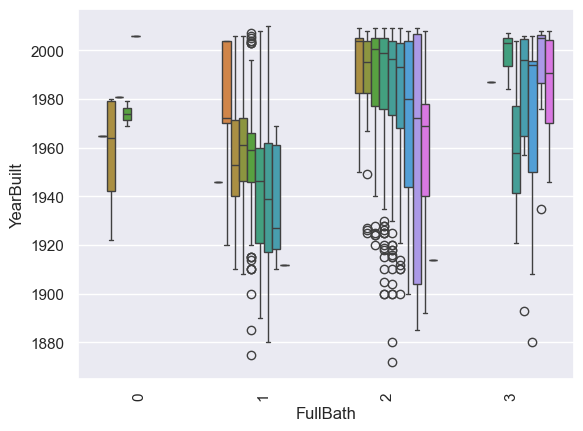

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                       sum_sq      df             F    PR(>F)
C(BedroomAbvGr)                           NaN     7.0           NaN       NaN
C(TotRmsAbvGrd)                  4.563304e-05    11.0  4.197458e-09  1.000000
C(BedroomAbvGr):C(TotRmsAbvGrd)  1.271063e+05    77.0  1.670229e+00  0.196439
Residual                         1.396505e+06  1413.0           NaN       NaN


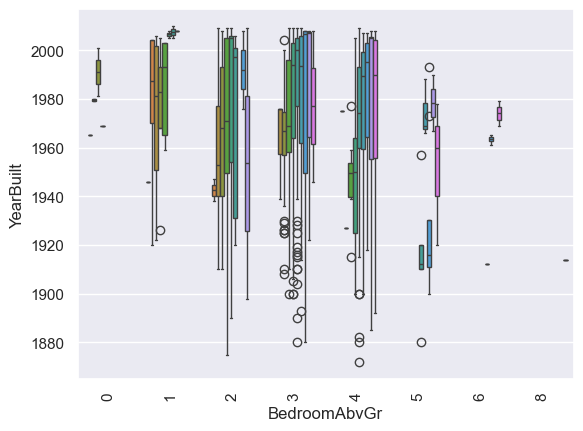

In [39]:
# biến YearBuilt
n = len(cat_X)
for i in range(n):
    for j in range(i+1, n):
        print('* '*40)
        _analyzer.analyze_continous_vs_categories(continous_var='YearBuilt', category_vars=[cat_X[i],cat_X[j]], 
                                                  df=selected_data)

<span style="font-size: 12px">

# Nhận định kết quả phân tích ANOVA với YearBuilt

Dựa trên cột PR(>F) và ngưỡng 0.05, ta có thể tóm tắt như sau:

## Các yếu tố và tương tác có ảnh hưởng đáng kể (PR(>F) < 0.05):

- **LotShape**: Ảnh hưởng trong bảng đầu tiên và tương tác với BedroomAbvGr, TotRmsAbvGrd.
- **HouseStyle**: Ảnh hưởng trong bảng thứ hai, thứ sáu và tương tác với Street.
- **FullBath**: Ảnh hưởng trong bảng thứ ba, thứ bảy và tương tác với Street, HouseStyle.
- **BedroomAbvGr**: Ảnh hưởng trong bảng thứ tư và tương tác với LotShape, HouseStyle.
- **TotRmsAbvGrd**: Ảnh hưởng rất mạnh trong bảng thứ năm, thứ chín, thứ mười ba, thứ mười lăm và tương tác với LotShape, Street, HouseStyle, FullBath.
- **Street**: Ảnh hưởng rất mạnh trong bảng thứ bảy, thứ tám, thứ chín và tương tác với HouseStyle, FullBath, BedroomAbvGr, TotRmsAbvGrd.

## Các yếu tố và tương tác không ảnh hưởng đáng kể (PR(>F) >= 0.05):

- **Street**: Ảnh hưởng riêng lẻ trong bảng đầu tiên.
- Tương tác **LotShape:Street**.
- Tương tác **LotShape:HouseStyle**.
- Tương tác **LotShape:FullBath**.
- **LotShape** riêng lẻ trong các bảng còn lại (ngoài bảng đầu tiên).
- Tương tác **FullBath:BedroomAbvGr**.
- Tương tác **BedroomAbvGr:TotRmsAbvGrd**.
- **HouseStyle** riêng lẻ trong bảng thứ mười.
- **FullBath** riêng lẻ trong bảng thứ mười bốn.
- **BedroomAbvGr** riêng lẻ trong bảng thứ mười bốn.
- **FullBath** riêng lẻ trong bảng thứ mười lăm.

## Tóm lại:

**TotRmsAbvGrd** và **Street**, cả riêng lẻ và trong tương tác với nhiều yếu tố khác, là những yếu tố có ảnh hưởng cực kỳ mạnh mẽ. **LotShape**, **HouseStyle**, **FullBath** và **BedroomAbvGr** cũng có ảnh hưởng đáng kể, chủ yếu thông qua tương tác. Các tương tác **LotShape:Street**, **LotShape:HouseStyle**, **LotShape:FullBath**, **FullBath:BedroomAbvGr**, **BedroomAbvGr:TotRmsAbvGrd** và ảnh hưởng riêng lẻ của **Street** trong bảng đầu tiên, **HouseStyle** trong bảng thứ mười, **FullBath** trong bảng thứ mười bốn, **BedroomAbvGr** trong bảng thứ mười bốn, **FullBath** trong bảng thứ mười lăm không đáng kể.

</span>


In [40]:
selected_data.rename(columns={'1stFlrSF': 'FirstFlrSF'}, inplace=True)
selected_data



,LotShape,Street,HouseStyle,LotArea,YearBuilt,FirstFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,Reg,Pave,2Story,8450,2003,856,854,2,3,8,208500
1,Reg,Pave,1Story,9600,1976,1262,0,2,3,6,181500
2,IR1,Pave,2Story,11250,2001,920,866,2,3,6,223500
3,IR1,Pave,2Story,9550,1915,961,756,1,3,7,140000
4,IR1,Pave,2Story,14260,2000,1145,1053,2,4,9,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Pave,2Story,7917,1999,953,694,2,3,7,175000
1456,Reg,Pave,1Story,13175,1978,2073,0,2,3,7,210000
1457,Reg,Pave,2Story,9042,1941,1188,1152,2,4,9,266500
1458,Reg,Pave,1Story,9717,1950,1078,0,1,2,5,142125


* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                             sum_sq      df          F        PR(>F)
C(LotShape)            1.098877e+07     3.0  25.435331  1.388512e-11
C(Street)              5.724906e+03     1.0   0.039754  8.419908e-01
C(LotShape):C(Street)  1.468650e+06     3.0   3.399434  1.720515e-02
Residual               2.092455e+08  1453.0        NaN           NaN


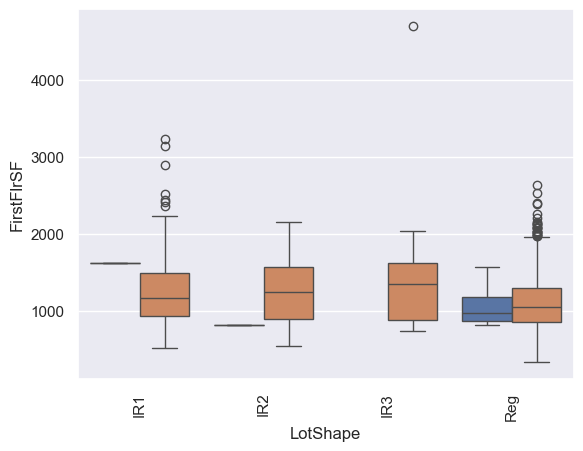

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df             F        PR(>F)
C(LotShape)                1.315456e-03     3.0  3.598969e-09  9.999521e-01
C(HouseStyle)              8.529279e+07     7.0  1.000086e+02  2.156125e-41
C(LotShape):C(HouseStyle)  4.577880e+06    21.0  1.789238e+00  4.500464e-02
Residual                   1.752007e+08  1438.0           NaN           NaN


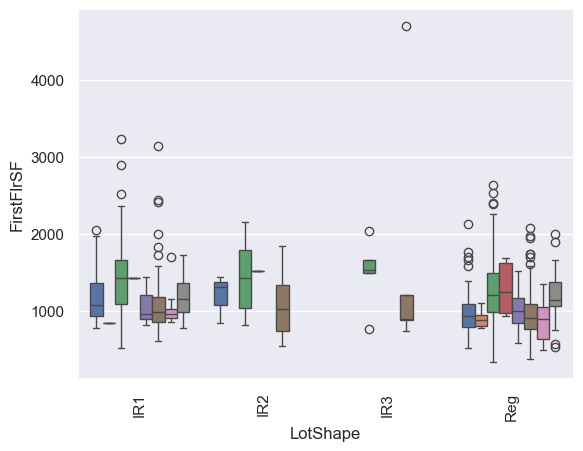

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                               sum_sq      df          F        PR(>F)
C(LotShape)              4.481670e+06     3.0  12.129473  5.969067e-06
C(FullBath)              1.687932e+07     3.0  45.683240  5.770469e-20
C(LotShape):C(FullBath)  3.887582e+06     9.0   3.507199  5.043278e-04
Residual                 1.782154e+08  1447.0        NaN           NaN


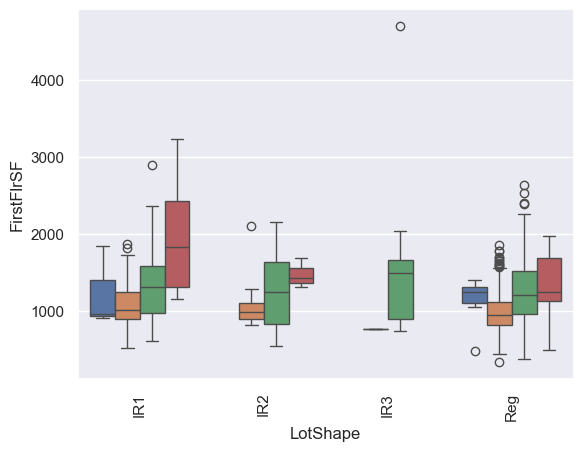

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F    PR(>F)
C(LotShape)                 -4.777952e-04     3.0 -1.150195e-09  1.000000
C(BedroomAbvGr)              3.628122e+06     7.0  3.743129e+00  0.023911
C(LotShape):C(BedroomAbvGr)  1.052878e+07    21.0  3.620842e+00  0.000003
Residual                     1.989783e+08  1437.0           NaN       NaN


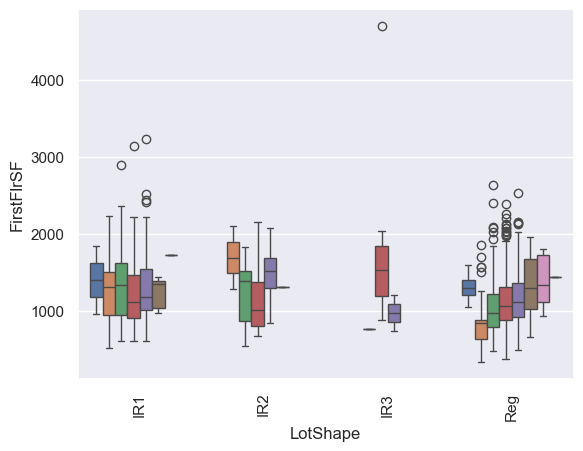

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F         PR(>F)
C(LotShape)                  1.194130e-07     3.0  3.496101e-13   9.999995e-01
C(TotRmsAbvGrd)              1.231132e+08    11.0  9.830271e+01  1.510350e-103
C(LotShape):C(TotRmsAbvGrd)  1.795301e+07    33.0  4.778337e+00   1.295933e-13
Residual                     1.621274e+08  1424.0           NaN            NaN


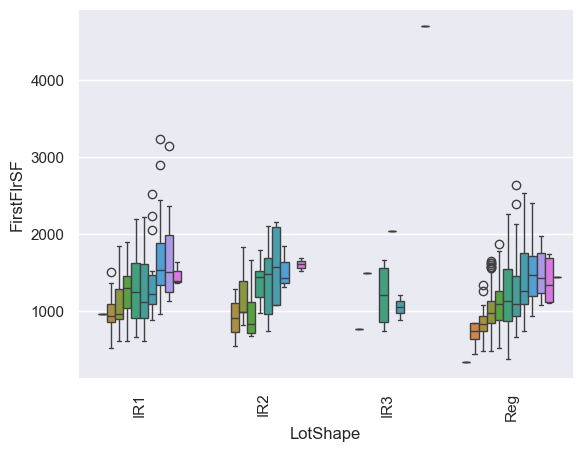

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                               sum_sq      df           F        PR(>F)
C(Street)                3.059092e+04     1.0    0.240793  6.237083e-01
C(HouseStyle)            1.066416e+08     7.0  119.916728  6.417877e-49
C(Street):C(HouseStyle)  3.486471e+06     7.0    3.920481  3.025131e-04
Residual                 1.840845e+08  1449.0         NaN           NaN


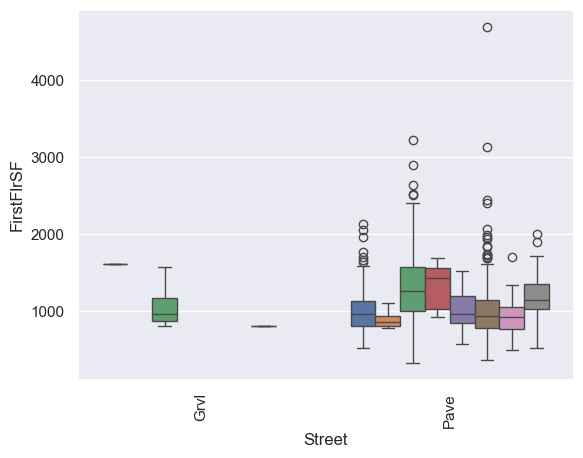

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                             sum_sq      df           F        PR(>F)
C(Street)              1.746122e+07     1.0  137.578687  2.015620e-30
C(FullBath)            4.054192e+07     3.0  106.477957  7.006359e-44
C(Street):C(FullBath)  8.256385e+06     3.0   21.684295  9.697113e-14
Residual               1.845388e+08  1454.0         NaN           NaN


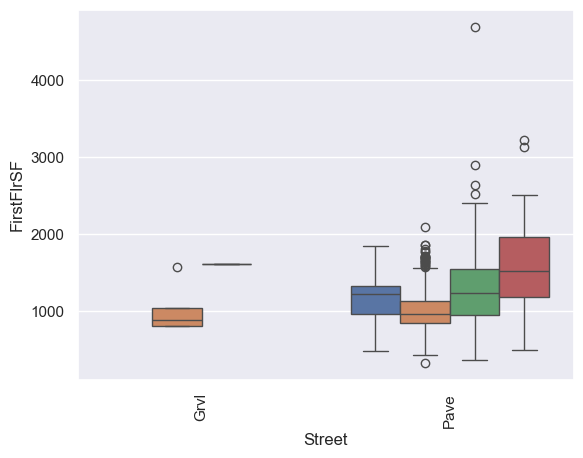

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df           F        PR(>F)
C(Street)                  5.824976e+07     1.0  396.220359  3.894978e-78
C(BedroomAbvGr)            2.006486e+06     7.0    1.949758  6.980704e-02
C(Street):C(BedroomAbvGr)  4.922697e+06     7.0    4.783521  2.471114e-05
Residual                   2.131696e+08  1450.0         NaN           NaN


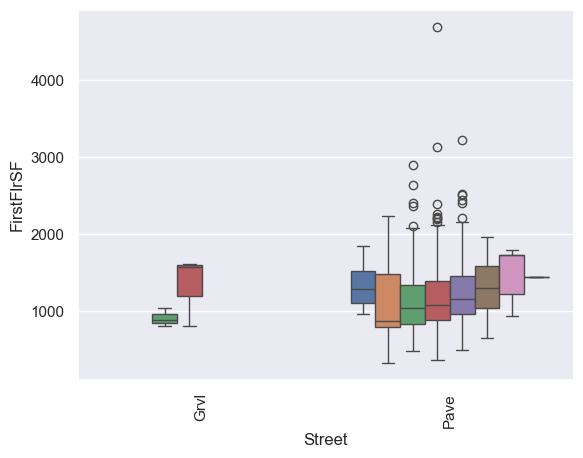

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df           F        PR(>F)
C(Street)                  5.172240e+07     1.0  418.671164  6.521785e-82
C(TotRmsAbvGrd)            2.011074e+07    11.0   14.798908  2.310085e-25
C(Street):C(TotRmsAbvGrd)  2.315534e+07    11.0   17.039346  4.752143e-32
Residual                   1.783909e+08  1444.0         NaN           NaN


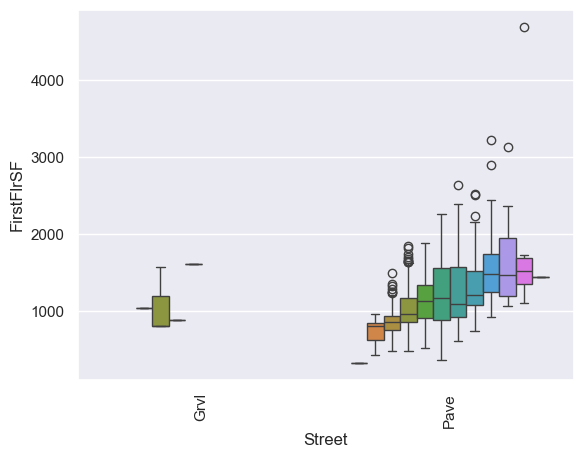

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df           F         PR(>F)
C(HouseStyle)              7.653560e+07     7.0  129.789319   1.148739e-94
C(FullBath)                1.373996e+08     3.0  543.672995  3.133556e-102
C(HouseStyle):C(FullBath)  1.587623e+07    21.0    8.974323   1.006543e-24
Residual                   1.208867e+08  1435.0         NaN            NaN


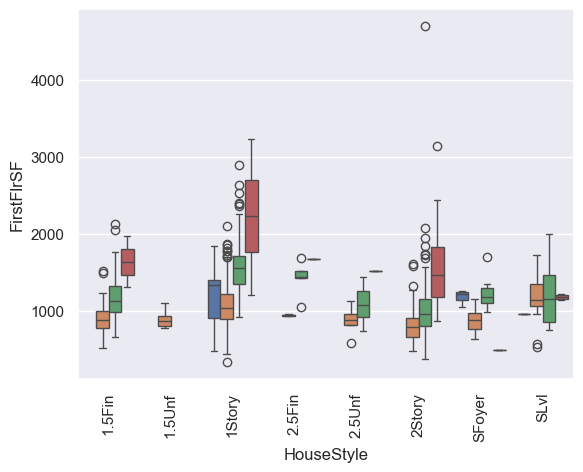

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                     sum_sq      df             F    PR(>F)
C(HouseStyle)                  2.264181e-02     7.0  2.882644e-08  0.999865
C(BedroomAbvGr)               -1.195415e-02     7.0 -1.521944e-08  1.000000
C(HouseStyle):C(BedroomAbvGr)  9.925866e+06    49.0  1.805304e+00  0.004467
Residual                       1.594469e+08  1421.0           NaN       NaN


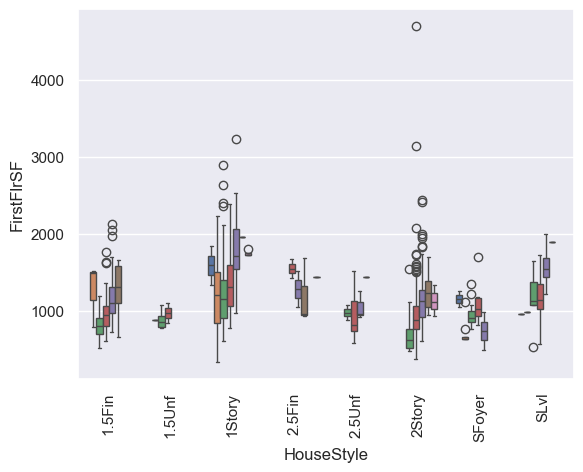

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                     sum_sq      df             F  \
C(HouseStyle)                  9.472155e-06     7.0  2.266809e-11   
C(TotRmsAbvGrd)                4.459541e+07    11.0  6.791437e+01   
C(HouseStyle):C(TotRmsAbvGrd)  4.451637e+07    77.0  9.684856e+00   
Residual                       8.375168e+07  1403.0           NaN   

                                     PR(>F)  
C(HouseStyle)                  9.999962e-01  
C(TotRmsAbvGrd)                7.030246e-29  
C(HouseStyle):C(TotRmsAbvGrd)  1.422019e-56  
Residual                                NaN  


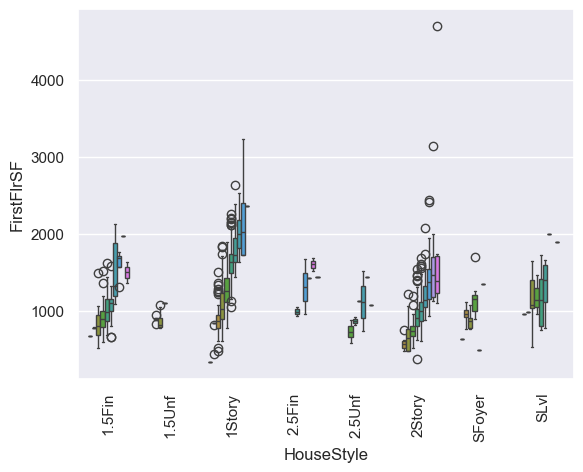

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F    PR(>F)
C(FullBath)                 -3.267336e-03     3.0 -8.729230e-09  1.000000
C(BedroomAbvGr)              3.193996e-04     7.0  3.657124e-10  1.000000
C(FullBath):C(BedroomAbvGr)  3.955803e+03    21.0  1.509798e-03  0.998491
Residual                     1.797880e+08  1441.0           NaN       NaN


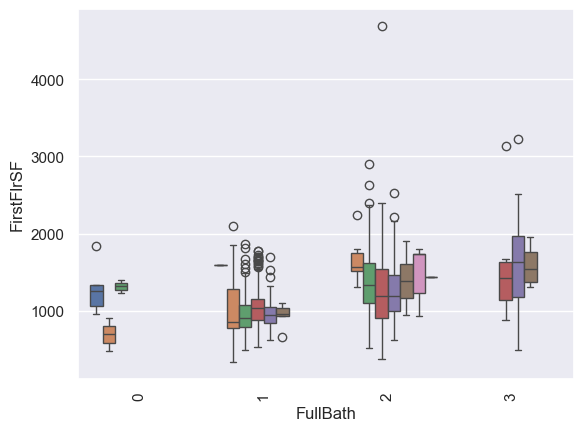

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F         PR(>F)
C(FullBath)                  9.287401e-05     3.0  2.695112e-10   9.999869e-01
C(TotRmsAbvGrd)              1.572940e+08    11.0  1.244868e+02  6.693470e-143
C(FullBath):C(TotRmsAbvGrd)  6.927398e+07    33.0  1.827511e+01   3.854235e-69
Residual                     1.641453e+08  1429.0           NaN            NaN


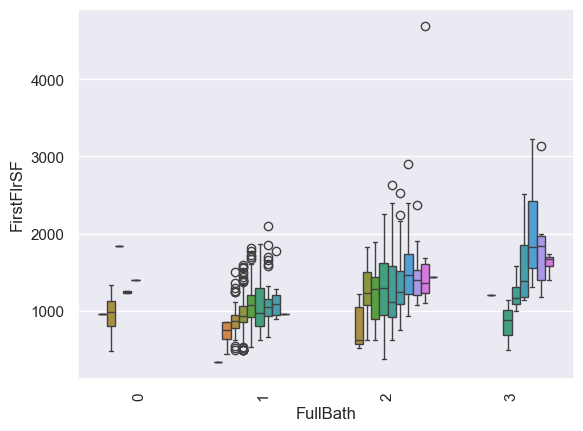

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                       sum_sq      df             F    PR(>F)
C(BedroomAbvGr)                           NaN     7.0           NaN       NaN
C(TotRmsAbvGrd)                 -2.072781e-03    11.0 -1.676239e-09  1.000000
C(BedroomAbvGr):C(TotRmsAbvGrd)  2.893411e+05    77.0  3.342677e-02  0.854958
Residual                         1.588426e+08  1413.0           NaN       NaN


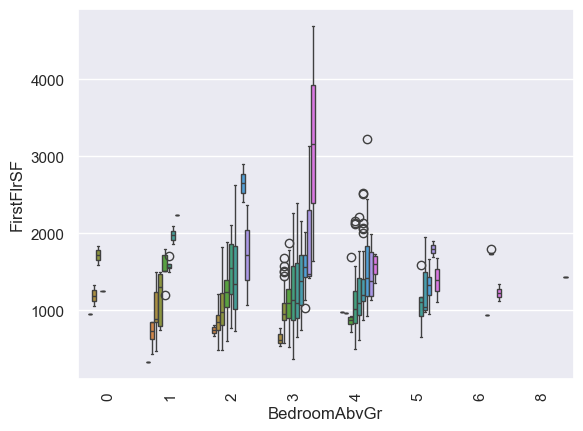

In [41]:
# biến 1stFlrSF
n = len(cat_X)
for i in range(n):
    for j in range(i+1, n):
        print('* '*40)
        _analyzer.analyze_continous_vs_categories(continous_var='FirstFlrSF', category_vars=[cat_X[i],cat_X[j]], 
                                                  df=selected_data)

<span style="font-size: 12px">

# Nhận định kết quả phân tích ANOVA với 1stFlrSF

Dựa trên cột PR(>F) và ngưỡng 0.05, ta có thể tóm tắt như sau:

## Các yếu tố và tương tác có ảnh hưởng đáng kể (PR(>F) < 0.05):

- **LotShape**: Ảnh hưởng trong bảng đầu tiên và tương tác với Street, FullBath, BedroomAbvGr, TotRmsAbvGrd.
- **HouseStyle**: Ảnh hưởng trong bảng thứ hai, thứ sáu, thứ mười và tương tác với LotShape, Street, FullBath, BedroomAbvGr, TotRmsAbvGrd.
- **FullBath**: Ảnh hưởng trong bảng thứ ba, thứ bảy, thứ mười và tương tác với LotShape, Street, HouseStyle, TotRmsAbvGrd.
- **BedroomAbvGr**: Ảnh hưởng trong bảng thứ tư, thứ tám, thứ mười một và tương tác với LotShape, Street, HouseStyle.
- **TotRmsAbvGrd**: Ảnh hưởng rất mạnh trong bảng thứ năm, thứ chín, thứ mười hai, thứ mười ba, thứ mười lăm và tương tác với LotShape, Street, HouseStyle, FullBath.
- **Street**: Ảnh hưởng trong bảng thứ bảy, thứ tám, thứ chín và tương tác với LotShape, HouseStyle, FullBath, BedroomAbvGr, TotRmsAbvGrd.
- Tương tác **HouseStyle:BedroomAbvGr**: Ảnh hưởng trong bảng thứ mười một.

## Các yếu tố và tương tác không ảnh hưởng đáng kể (PR(>F) >= 0.05):

- **Street**: Ảnh hưởng riêng lẻ trong bảng đầu tiên.
- Tương tác **LotShape:Street**.
- **LotShape** riêng lẻ trong các bảng còn lại (ngoài bảng đầu tiên).
- Tương tác **LotShape:HouseStyle**.
- Tương tác **LotShape:FullBath**.
- Tương tác **FullBath:BedroomAbvGr**.
- Tương tác **BedroomAbvGr:TotRmsAbvGrd**.
- **BedroomAbvGr** riêng lẻ trong bảng thứ tám.
- **FullBath** riêng lẻ trong bảng thứ mười bốn.
- **TotRmsAbvGrd** riêng lẻ trong bảng thứ mười sáu.

## Tóm lại:

**TotRmsAbvGrd** và **Street**, cả riêng lẻ và trong tương tác với nhiều yếu tố khác, là những yếu tố có ảnh hưởng cực kỳ mạnh mẽ. **LotShape**, **HouseStyle**, **FullBath** và **BedroomAbvGr** cũng có ảnh hưởng đáng kể, chủ yếu thông qua tương tác. Các tương tác **LotShape:Street**, **LotShape:HouseStyle**, **LotShape:FullBath**, **FullBath:BedroomAbvGr**, **BedroomAbvGr:TotRmsAbvGrd** và ảnh hưởng riêng lẻ của **Street** trong bảng đầu tiên, **TotRmsAbvGrd** trong bảng thứ mười sáu, **FullBath** trong bảng thứ mười bốn, **BedroomAbvGr** trong bảng thứ tám không đáng kể. Đặc biệt, tương tác **HouseStyle:BedroomAbvGr** chỉ có ý nghĩa trong một bảng duy nhất (thứ mười một).

</span>


In [42]:
selected_data.rename(columns={'2ndFlrSF': 'SecondFlrSF'}, inplace=True)
selected_data

,LotShape,Street,HouseStyle,LotArea,YearBuilt,FirstFlrSF,SecondFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,Reg,Pave,2Story,8450,2003,856,854,2,3,8,208500
1,Reg,Pave,1Story,9600,1976,1262,0,2,3,6,181500
2,IR1,Pave,2Story,11250,2001,920,866,2,3,6,223500
3,IR1,Pave,2Story,9550,1915,961,756,1,3,7,140000
4,IR1,Pave,2Story,14260,2000,1145,1053,2,4,9,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Pave,2Story,7917,1999,953,694,2,3,7,175000
1456,Reg,Pave,1Story,13175,1978,2073,0,2,3,7,210000
1457,Reg,Pave,2Story,9042,1941,1188,1152,2,4,9,266500
1458,Reg,Pave,1Story,9717,1950,1078,0,1,2,5,142125


* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                             sum_sq      df         F    PR(>F)
C(LotShape)            3.751538e+06     3.0  6.616172  0.001379
C(Street)              6.992129e+05     1.0  3.699373  0.054628
C(LotShape):C(Street)  2.787342e+05     3.0  0.491573  0.688173
Residual               2.746293e+08  1453.0       NaN       NaN


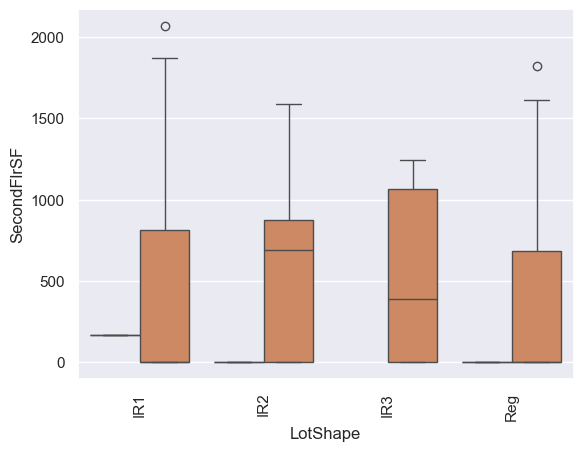

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df             F        PR(>F)
C(LotShape)                4.441857e-03     3.0  5.079569e-08  9.998202e-01
C(HouseStyle)              6.216711e+08     7.0  3.046816e+03  0.000000e+00
C(LotShape):C(HouseStyle)  3.226637e+06    21.0  5.271259e+00  9.254742e-09
Residual                   4.191557e+07  1438.0           NaN           NaN


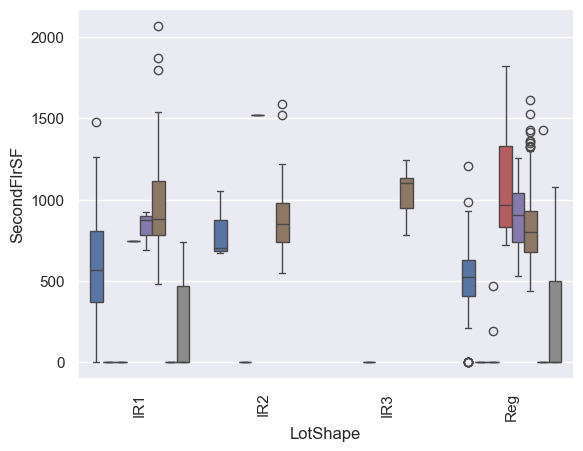

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                               sum_sq      df           F        PR(>F)
C(LotShape)              3.204121e+02     3.0    0.000693  9.993070e-01
C(FullBath)              4.697477e+07     3.0  101.641434  4.960054e-42
C(LotShape):C(FullBath)  1.417680e+06     9.0    1.022499  4.166746e-01
Residual                 2.229160e+08  1447.0         NaN           NaN


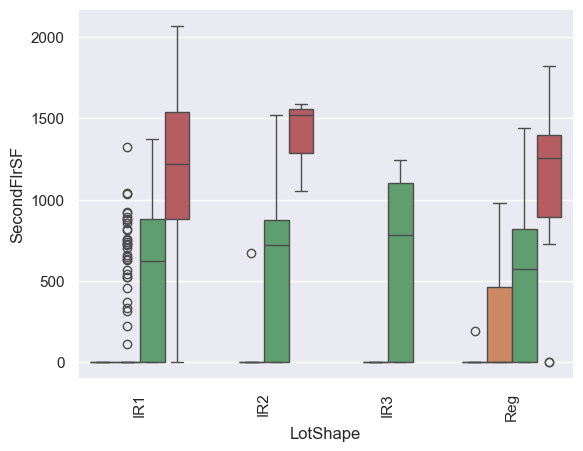

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F        PR(>F)
C(LotShape)                 -1.063358e-04     3.0 -2.700969e-10  1.000000e+00
C(BedroomAbvGr)              2.628387e+07     7.0  2.861228e+01  6.529581e-13
C(LotShape):C(BedroomAbvGr)  7.625598e+06    21.0  2.767042e+00  3.085427e-04
Residual                     1.885800e+08  1437.0           NaN           NaN


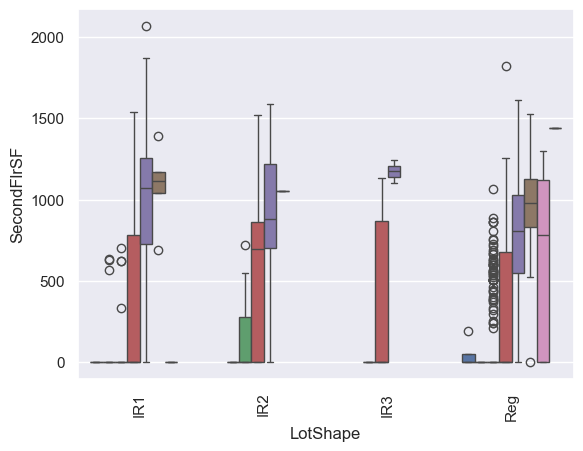

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F         PR(>F)
C(LotShape)                  2.072104e-08     3.0  6.139727e-14   1.000000e+00
C(TotRmsAbvGrd)              1.276910e+08    11.0  1.031874e+02  5.505216e-108
C(LotShape):C(TotRmsAbvGrd)  7.755941e+06    33.0  2.089197e+00   1.305335e-03
Residual                     1.601958e+08  1424.0           NaN            NaN


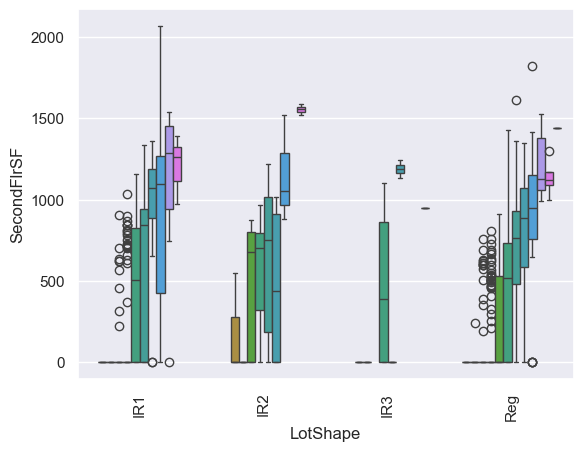

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                               sum_sq      df            F         PR(>F)
C(Street)                6.031738e+04     1.0     1.970584   1.606002e-01
C(HouseStyle)            6.611899e+08     7.0  3085.890779   0.000000e+00
C(Street):C(HouseStyle)  4.414540e+07     7.0   206.034409  3.281071e-212
Residual                 4.435228e+07  1449.0          NaN            NaN


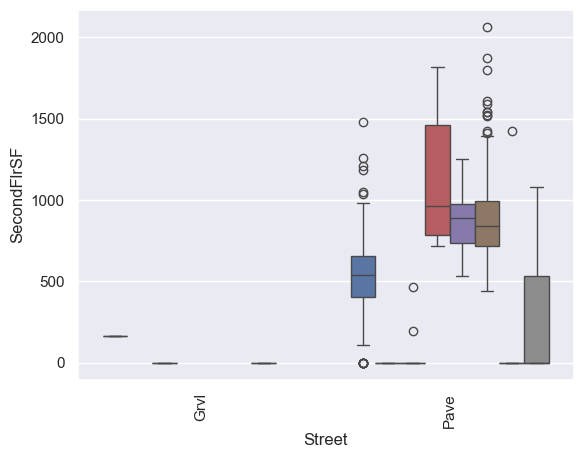

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                             sum_sq      df           F        PR(>F)
C(Street)              1.720069e+07     1.0  111.679935  3.352738e-25
C(FullBath)            6.186868e+07     3.0  133.899455  4.217915e-54
C(Street):C(FullBath)  1.234979e+07     3.0   26.728064  7.929418e-17
Residual               2.239418e+08  1454.0         NaN           NaN


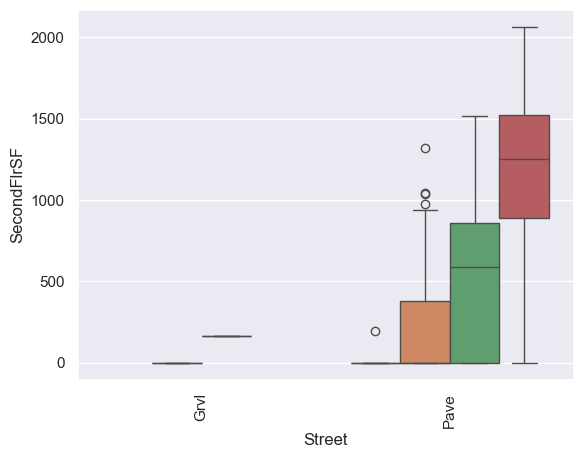

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df           F         PR(>F)
C(Street)                  7.298535e+07     1.0  549.894150  2.303983e-103
C(BedroomAbvGr)            6.153182e+07     7.0   66.228529   6.778360e-73
C(Street):C(BedroomAbvGr)  3.230387e+07     7.0   34.769619   4.765910e-45
Residual                   1.924530e+08  1450.0         NaN            NaN


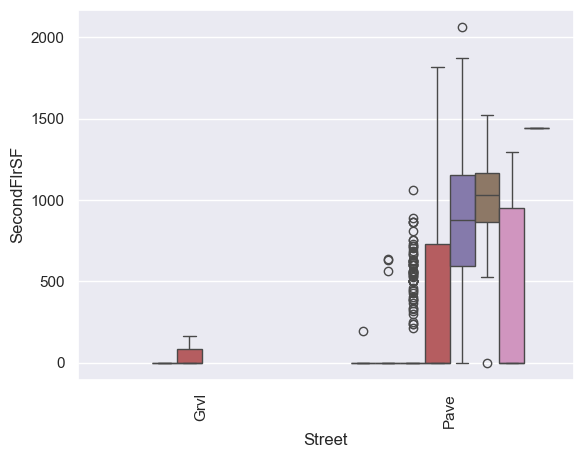

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df           F         PR(>F)
C(Street)                  8.773111e+07     1.0  768.559403  5.552578e-136
C(TotRmsAbvGrd)            1.029970e+08    11.0   82.026830  6.611616e-123
C(Street):C(TotRmsAbvGrd)  2.843802e+07    11.0   22.648037   3.281105e-43
Residual                   1.648327e+08  1444.0         NaN            NaN


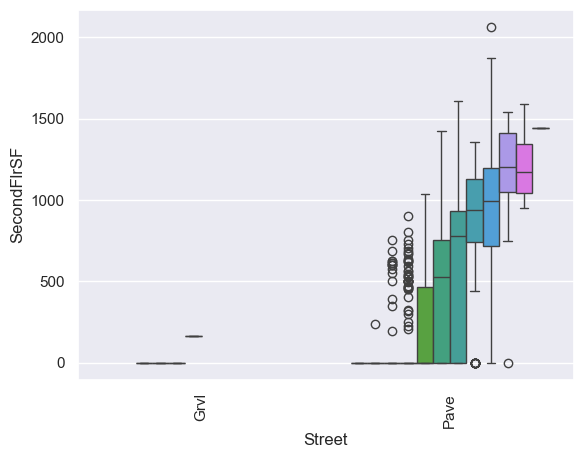

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df            F         PR(>F)
C(HouseStyle)              2.413172e+08     7.0  1667.150000   0.000000e+00
C(FullBath)                2.158765e+07     3.0   347.991455   1.043842e-69
C(HouseStyle):C(FullBath)  2.616466e+07    21.0    60.253213  2.859883e-167
Residual                   2.967341e+07  1435.0          NaN            NaN


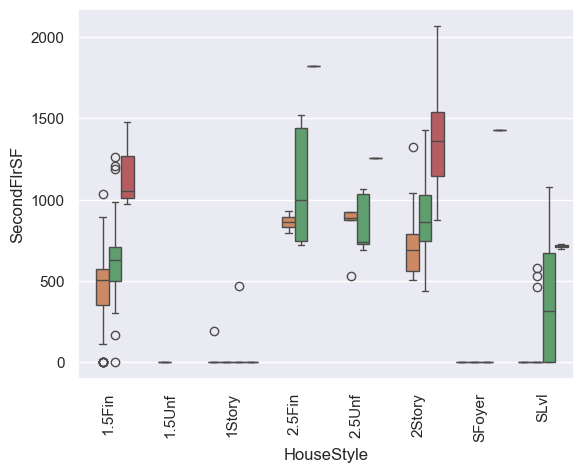

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                     sum_sq      df             F  \
C(HouseStyle)                  6.224492e-03     7.0  4.084726e-08   
C(BedroomAbvGr)               -4.753586e-02     7.0 -3.119467e-07   
C(HouseStyle):C(BedroomAbvGr)  4.428047e+07    49.0  4.151195e+01   
Residual                       3.093407e+07  1421.0           NaN   

                                      PR(>F)  
C(HouseStyle)                   9.998388e-01  
C(BedroomAbvGr)                 1.000000e+00  
C(HouseStyle):C(BedroomAbvGr)  1.786697e-174  
Residual                                 NaN  


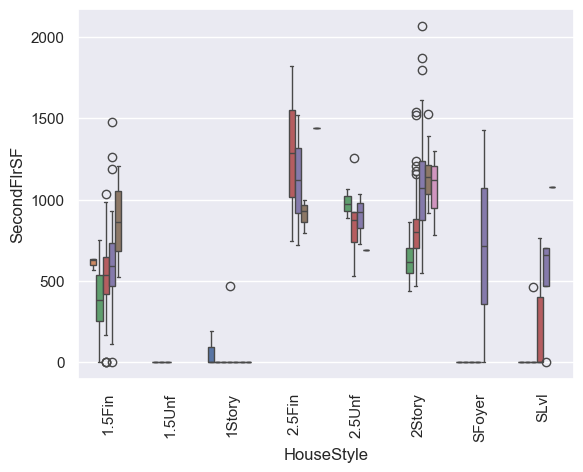

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                     sum_sq      df             F  \
C(HouseStyle)                 -4.467891e-03     7.0 -3.769714e-08   
C(TotRmsAbvGrd)                7.497517e+07    11.0  4.025582e+02   
C(HouseStyle):C(TotRmsAbvGrd)  7.607068e+07    77.0  5.834861e+01   
Residual                       2.375493e+07  1403.0           NaN   

                                      PR(>F)  
C(HouseStyle)                   1.000000e+00  
C(TotRmsAbvGrd)                6.753785e-139  
C(HouseStyle):C(TotRmsAbvGrd)  9.210173e-289  
Residual                                 NaN  


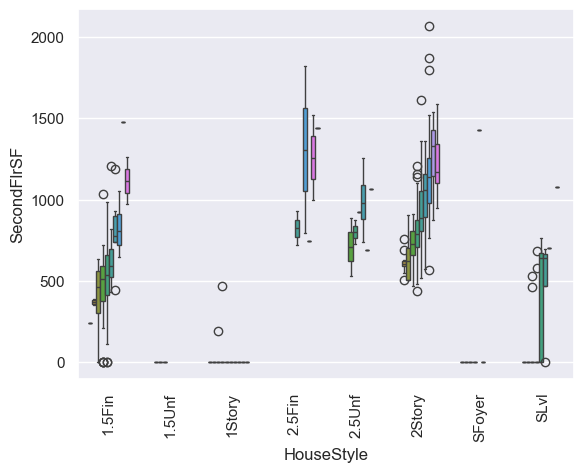

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F    PR(>F)
C(FullBath)                 -2.789856e-04     3.0 -7.902215e-10  1.000000
C(BedroomAbvGr)             -1.306007e-04     7.0 -1.585388e-10  1.000000
C(FullBath):C(BedroomAbvGr)  2.049922e+06    21.0  8.294810e-01  0.436484
Residual                     1.695804e+08  1441.0           NaN       NaN


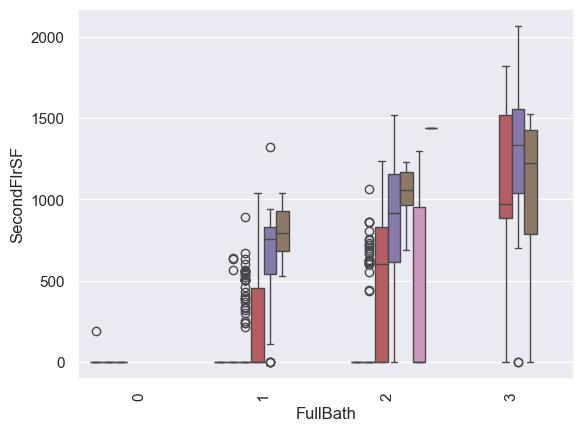

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                   sum_sq      df             F         PR(>F)
C(FullBath)                  2.320628e-04     3.0  6.995510e-10   9.999789e-01
C(TotRmsAbvGrd)              5.441460e+07    11.0  4.473608e+01   1.879965e-57
C(FullBath):C(TotRmsAbvGrd)  1.165241e+08    33.0  3.193280e+01  7.875193e-119
Residual                     1.580146e+08  1429.0           NaN            NaN


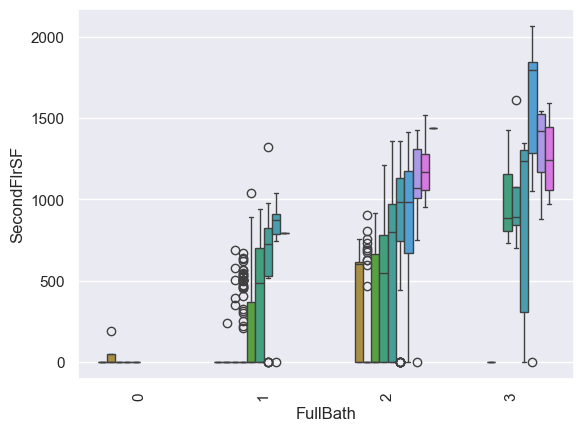

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                       sum_sq      df             F    PR(>F)
C(BedroomAbvGr)                           NaN     7.0           NaN       NaN
C(TotRmsAbvGrd)                  1.739887e-04    11.0  1.529880e-10  1.000000
C(BedroomAbvGr):C(TotRmsAbvGrd)  2.438771e+07    77.0  3.063439e+00  0.080289
Residual                         1.460876e+08  1413.0           NaN       NaN


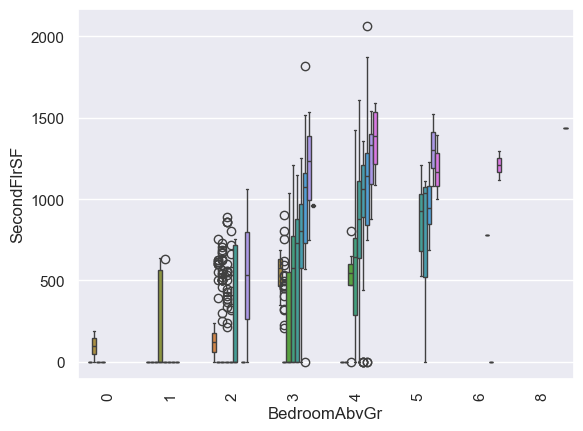

In [43]:
# biến 2ndFlrSF
n = len(cat_X)
for i in range(n):
    for j in range(i+1, n):
        print('* '*40)
        _analyzer.analyze_continous_vs_categories(continous_var='SecondFlrSF', category_vars=[cat_X[i],cat_X[j]], 
                                                  df=selected_data)

<span style="font-size: 12px">

# Nhận định kết quả phân tích ANOVA với 2ndFlrSF

Dựa vào cột PR(>F) và ngưỡng 0.05, ta có thể tóm tắt như sau:

## Các yếu tố và tương tác có ảnh hưởng đáng kể (PR(>F) < 0.05):
- **LotShape**: Ảnh hưởng trong bảng đầu tiên (với Street) và tương tác với HouseStyle, BedroomAbvGr, TotRmsAbvGrd.
- **HouseStyle**: Ảnh hưởng mạnh trong nhiều bảng và tương tác với LotShape, FullBath, BedroomAbvGr, TotRmsAbvGrd.
- **FullBath**: Ảnh hưởng và tương tác với LotShape, Street, HouseStyle và TotRmsAbvGrd.
- **BedroomAbvGr**: Ảnh hưởng và tương tác với LotShape, Street, HouseStyle.
- **TotRmsAbvGrd**: Ảnh hưởng và tương tác với LotShape, Street, HouseStyle, FullBath.
- **Street**: Ảnh hưởng trong bảng thứ bảy và tương tác với FullBath, BedroomAbvGr, TotRmsAbvGrd.

## Các yếu tố và tương tác không ảnh hưởng đáng kể (PR(>F) >= 0.05):
- Tương tác LotShape:Street (bảng đầu).
- Bản thân LotShape trong các bảng còn lại (ngoài bảng đầu).
- Tương tác LotShape:FullBath (bảng ba).
- Street (bảng sáu).
- Một số tương tác bậc cao phức tạp hơn (ví dụ BedroomAbvGr:TotRmsAbvGrd bảng cuối).

## Tóm lại
HouseStyle, FullBath, BedroomAbvGr, TotRmsAbvGrd và tương tác của chúng với LotShape và Street là những yếu tố chính có ảnh hưởng đáng kể. Cần tập trung vào các yếu tố này khi phân tích dữ liệu. Các yếu tố và tương tác còn lại có thể bỏ qua vì không có ý nghĩa thống kê.

</span>


In [44]:
# biến dự báo và dự đoán: biến SalePrice
# ? các biến số nào có tương quan với biến SalePrice (biến số và biến số)
# ? các biến phân loại nào có tương quan với biến SalePrice (biến phân loại và biến số)
num_X,cat_X   

(Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF'], dtype='object'),
 Index(['LotShape', 'Street', 'HouseStyle', 'FullBath', 'BedroomAbvGr',
        'TotRmsAbvGrd'],
       dtype='object'))

In [45]:
selected_data

,LotShape,Street,HouseStyle,LotArea,YearBuilt,FirstFlrSF,SecondFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,Reg,Pave,2Story,8450,2003,856,854,2,3,8,208500
1,Reg,Pave,1Story,9600,1976,1262,0,2,3,6,181500
2,IR1,Pave,2Story,11250,2001,920,866,2,3,6,223500
3,IR1,Pave,2Story,9550,1915,961,756,1,3,7,140000
4,IR1,Pave,2Story,14260,2000,1145,1053,2,4,9,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Pave,2Story,7917,1999,953,694,2,3,7,175000
1456,Reg,Pave,1Story,13175,1978,2073,0,2,3,7,210000
1457,Reg,Pave,2Story,9042,1941,1188,1152,2,4,9,266500
1458,Reg,Pave,1Story,9717,1950,1078,0,1,2,5,142125


### Phân tích tương quan các biến số với SalePrice

In [46]:
# Danh sách cột ban đầu
selected_columns = [
    'LotShape',
    'Street',
    'HouseStyle',
    'LotArea',
    'YearBuilt',
    '1stFlrSF',
    '2ndFlrSF',
    'FullBath',
    'BedroomAbvGr',
    'TotRmsAbvGrd',
    'SalePrice'
]

# Sử dụng list comprehension để đổi tên cột
selected_columns = [
    'FirstFlrSF' if col == '1stFlrSF' else
    'SecondFlrSF' if col == '2ndFlrSF' else col
    for col in selected_columns
]

# In danh sách sau khi đổi tên
print(selected_columns)


['LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', 'FirstFlrSF', 'SecondFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']


In [47]:
corr=selected_data[selected_columns].corr()
corr

,LotArea,YearBuilt,FirstFlrSF,SecondFlrSF,SalePrice
LotArea,1.000000,0.014228,0.299475,0.050986,0.263843
YearBuilt,0.014228,1.000000,0.281986,0.010308,0.522897
FirstFlrSF,0.299475,0.281986,1.000000,-0.202646,0.605852
SecondFlrSF,0.050986,0.010308,-0.202646,1.000000,0.319334
SalePrice,0.263843,0.522897,0.605852,0.319334,1.000000


# Nhận xét
1. **FirstFlrSF (0.605852)**: Có hệ số tương quan cao nhất với SalePrice, nghĩa là diện tích tầng 1 (FirstFlrSF) có mối quan hệ mạnh nhất với giá bán.
2. **YearBuilt (0.522897)**: Xếp thứ hai, thể hiện mối quan hệ khá mạnh giữa năm xây dựng và giá bán.
3. **SecondFlrSF (0.319334)**: Có mối quan hệ yếu hơn nhưng vẫn tích cực với giá bán.
4. **LotArea (0.263843)**: Mối quan hệ yếu nhất trong các biến này.

# Kết luận
- **Biến quan trọng nhất để dự đoán SalePrice**: FirstFlrSF.
- Nếu cần chọn thêm, có thể cân nhắc YearBuilt.


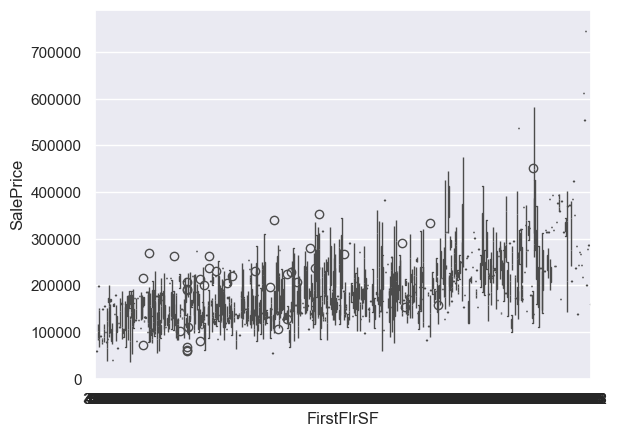

In [48]:
# Giá bán nhà có khác nhau theo mỗi diện tích của tầng trệt (tầng 1) trong đơn vị thước vuông
sns.boxplot(data=selected_data,x='FirstFlrSF',y='SalePrice')
plt.show()

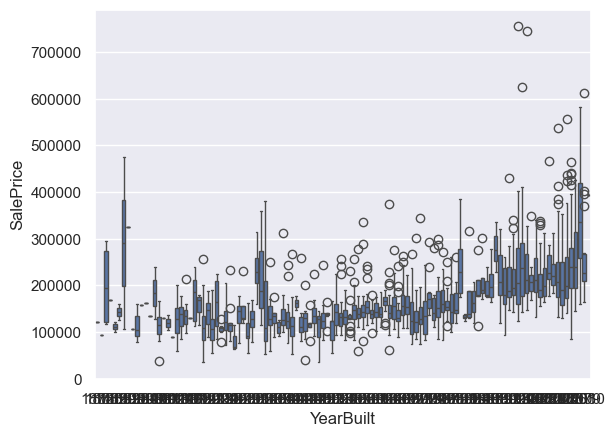

In [49]:
# Giá bán nhà có khác nhau theo mỗi năm xây dựng ngôi nhà.
sns.boxplot(data=selected_data,x='YearBuilt',y='SalePrice')
plt.show()

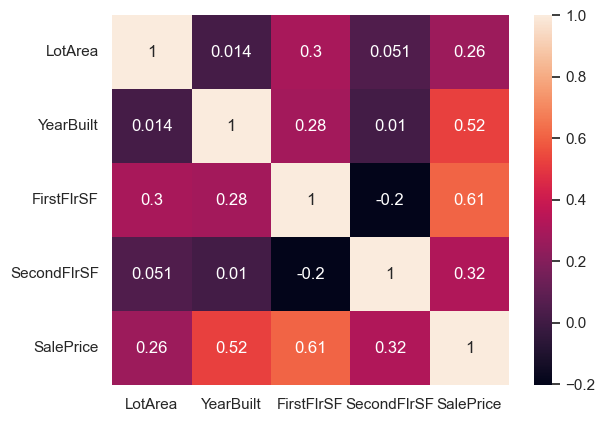

In [50]:
sns.heatmap(corr, annot=True)
plt.show()

### Phân tích mối tương quan giữa các biến phân loại và biến số.

In [51]:
from scipy.stats import f_oneway, ttest_ind

def analyze_categorical_vs_numeric(df, cat_vars, numeric_var, alpha=0.05):
    """
    Phân tích mối tương quan giữa các biến phân loại và biến số.
    
    Parameters:
        df: DataFrame
        cat_vars: Danh sách các biến phân loại
        numeric_var: Tên biến số
        alpha: Ngưỡng p-value để xác định mối tương quan đáng kể
        
    Returns:
        Dictionary chứa thông tin kết quả phân tích cho các biến có tương quan mạnh
    """
    results = {}
    for cat in cat_vars:
        unique_values = df[cat].nunique()
        if unique_values <= 2:  # Nếu biến phân loại chỉ có 2 nhóm
            groups = [df[df[cat] == val][numeric_var] for val in df[cat].unique()]
            stat, p = ttest_ind(*groups, nan_policy='omit')
            method = "T-Test"
        else:  # Nếu biến phân loại có nhiều hơn 2 nhóm
            groups = [df[df[cat] == val][numeric_var] for val in df[cat].unique()]
            stat, p = f_oneway(*groups)
            method = "ANOVA"
        
        # Chỉ lưu biến nếu p-value < alpha
        if p < alpha:
            results[cat] = {'method': method, 'statistic': stat, 'p-value': p}
    
    return results

# Áp dụng hàm để phân tích
results = analyze_categorical_vs_numeric(selected_data, cat_X, 'SalePrice', alpha=0.05)

# Hiển thị kết quả các biến có tương quan mạnh
if results:
    print("Các biến phân loại có tương quan mạnh với SalePrice:")
    for cat, result in results.items():
        print(f"Biến: {cat}")
        print(f"  Phương pháp: {result['method']}")
        print(f"  Giá trị thống kê: {result['statistic']:.4f}")
        print(f"  P-value: {result['p-value']:.4f}")
        print()
else:
    print("Không có biến phân loại nào có tương quan đáng kể với SalePrice.")


Các biến phân loại có tương quan mạnh với SalePrice:
Biến: LotShape
  Phương pháp: ANOVA
  Giá trị thống kê: 40.1329
  P-value: 0.0000

Biến: HouseStyle
  Phương pháp: ANOVA
  Giá trị thống kê: 19.5950
  P-value: 0.0000

Biến: FullBath
  Phương pháp: ANOVA
  Giá trị thống kê: 246.0670
  P-value: 0.0000

Biến: BedroomAbvGr
  Phương pháp: ANOVA
  Giá trị thống kê: 12.9254
  P-value: 0.0000

Biến: TotRmsAbvGrd
  Phương pháp: ANOVA
  Giá trị thống kê: 56.1642
  P-value: 0.0000



### 7. Kiểm tra và xóa các outlier (nếu có)

In [52]:
# Dùng IQR method
def remove_outliers(df, column_name, lower_percentile=0.25, upper_percentile=0.75, threshold=1.5):
    Q1 = df[column_name].quantile(lower_percentile)
    Q3 = df[column_name].quantile(upper_percentile)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [ ]:
# Dùng quy tắc ngoài 3 độ lệch chuẩn

def remove_outliers_zscore(df, column_name, threshold=3):
    z_scores = stats.zscore(df[column_name])
    return df[abs(z_scores) < threshold]

In [54]:
num_X

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF'], dtype='object')

<Axes: ylabel='YearBuilt'>

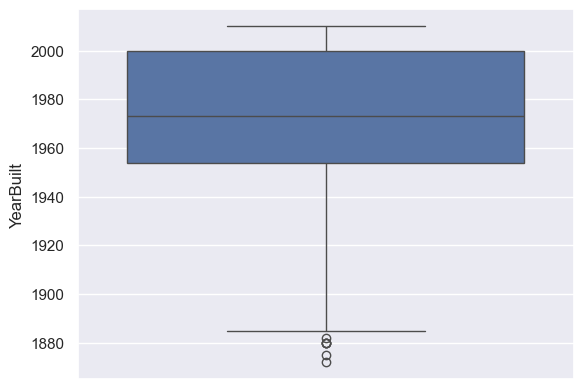

In [55]:
# Kiểm tra kết quả
sns.boxplot(X['YearBuilt'])

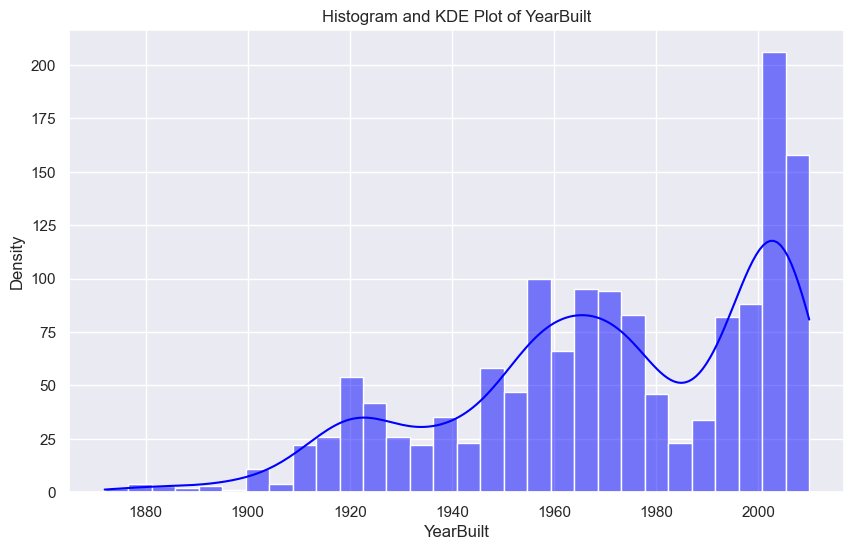

In [56]:
# Vẽ biểu đồ Histogram với KDE
plt.figure(figsize=(10, 6))
sns.histplot(X['YearBuilt'], kde=True, bins=30, color='blue')
plt.xlabel('YearBuilt')
plt.ylabel('Density')
plt.title('Histogram and KDE Plot of YearBuilt')
plt.show()


<Axes: ylabel='YearBuilt'>

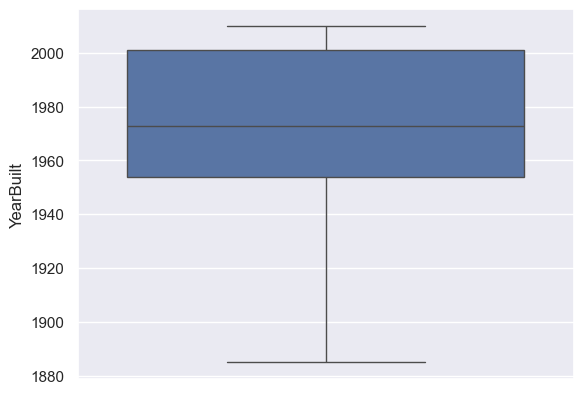

In [57]:
# Áp dụng phương pháp IQR để loại bỏ giá trị ngoại lai cho biến 'YearBuilt'
X = remove_outliers(X, 'YearBuilt', lower_percentile=0.25, upper_percentile=0.75, threshold=1.5)

# Kiểm tra kết quả
sns.boxplot(X['YearBuilt'])

<Axes: ylabel='1stFlrSF'>

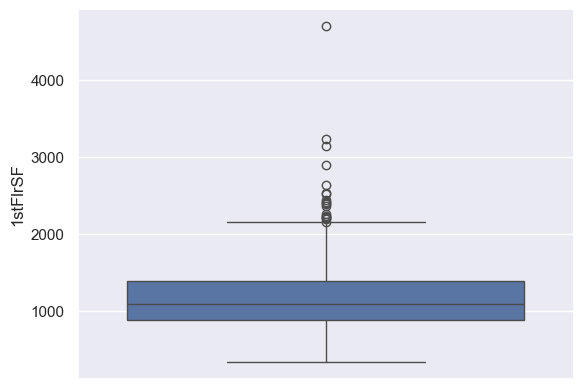

In [58]:
# Kiểm tra kết quả
sns.boxplot(X['1stFlrSF'])

<Axes: ylabel='1stFlrSF'>

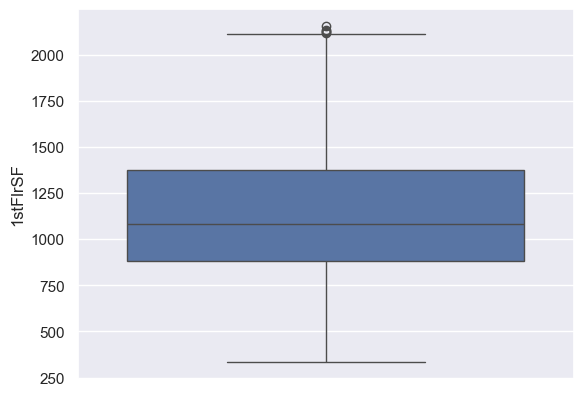

In [59]:
# Áp dụng phương pháp IQR để loại bỏ giá trị ngoại lai cho biến '1stFlrSF'
X = remove_outliers(X, '1stFlrSF', lower_percentile=0.25, upper_percentile=0.75, threshold=1.5)
sns.boxplot(X['1stFlrSF'])

<Axes: ylabel='2ndFlrSF'>

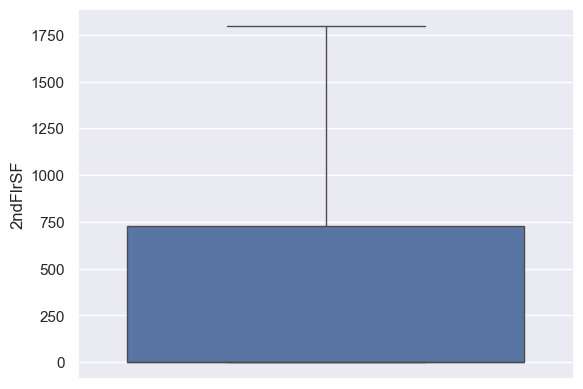

In [60]:
# Kiểm tra kết quả
sns.boxplot(X['2ndFlrSF'])
# Không phát hiện outlier

## Phần 3 : Feature Engineering 
1. Chọn ra các biến định lượng input có tương quan với biến output (xét hệ số tương quan >=0.3 hoặc hệ số tương quan <=-0.3). 
2. Chọn ra các biến định tính input có tương quan với biến output (xét p-value <=0.05). 
3. Chuẩn hóa các biến định tính input bằng `one-hot encoder`. 
4. Chuẩn hóa các biến định lượng input bằng `StandardScaler`.

<span style="font-size: 12px">

# Nhận xét về tương quan với SalePrice

## Biến định lượng có tương quan với SalePrice (|corr| ≥ 0.3):
1. **FirstFlrSF (0.605852)**: Hệ số tương quan cao nhất, cho thấy diện tích tầng 1 (FirstFlrSF) có mối quan hệ mạnh nhất với giá bán.
2. **YearBuilt (0.522897)**: Mối quan hệ tương đối mạnh, phản ánh giá trị của ngôi nhà tăng theo năm xây dựng.
3. **SecondFlrSF (0.319334)**: Có mối quan hệ tích cực và yếu hơn với giá bán.

## Loại bỏ:
- **LotArea (0.263843)**: Không đạt ngưỡng hệ số tương quan 0.3.

## Kết luận:
- **FirstFlrSF** là biến quan trọng nhất để dự đoán SalePrice.
- **YearBuilt** và **SecondFlrSF** cũng đáng xem xét, nhưng mối quan hệ với SalePrice yếu hơn.
- **LotArea** có mối quan hệ không đáng kể với SalePrice và có thể không cần ưu tiên đưa vào mô hình.

</span>


### 1.Chọn ra các biến định lượng input có tương quan với biến ouput (xét hệ số tương quan >=0.3 hoặc hệ số tương quan <=-0.3) 

In [61]:
# Chọn ra các biến định lượng input có tương quan với biến ouput (xét hệ số tương quan >=0.3 hoặc hệ số tương quan <=-0.3) 

# Tính hệ số tương quan
corr_matrix = selected_data.corr()

# Lọc các biến có tương quan đáng kể với SalePrice
threshold = 0.3
strong_corr = corr_matrix['SalePrice'][corr_matrix['SalePrice'].abs() >= threshold]

# Loại bỏ SalePrice ra khỏi danh sách
strong_corr = strong_corr.drop('SalePrice')

# Lưu trữ tên các biến định lượng có tương quan mạnh vào một danh sách
strong_corr_columns = strong_corr.index.tolist()

# In danh sách các biến được chọn
print("Danh sách các biến định lượng có tương quan mạnh với SalePrice:")
print(strong_corr_columns)

# Nếu muốn lưu vào một DataFrame mới với các biến đã chọn
selected_numeric_data = selected_data[strong_corr_columns]
selected_numeric_data

Danh sách các biến định lượng có tương quan mạnh với SalePrice:
['YearBuilt', 'FirstFlrSF', 'SecondFlrSF']


,YearBuilt,FirstFlrSF,SecondFlrSF
0,2003,856,854
1,1976,1262,0
2,2001,920,866
3,1915,961,756
4,2000,1145,1053
...,...,...,...
1455,1999,953,694
1456,1978,2073,0
1457,1941,1188,1152
1458,1950,1078,0


### 2. Chọn ra các biến định tính input có tương quan với biến ouput (xét p-value<=0.05) 

In [62]:
# Chọn ra các biến định tính input có tương quan với biến ouput (xét p-value<=0.05) 
# Lưu trữ các biến có p-value <= 0.05
significant_cat_vars = {cat: result for cat, result in results.items()}

significant_cat_var_names = list(significant_cat_vars.keys())
print("Tên các biến phân loại có tương quan mạnh với SalePrice:")
print(significant_cat_var_names)

significant_cat_data=selected_data[significant_cat_var_names]
significant_cat_data


Tên các biến phân loại có tương quan mạnh với SalePrice:
['LotShape', 'HouseStyle', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']


,LotShape,HouseStyle,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,Reg,2Story,2,3,8
1,Reg,1Story,2,3,6
2,IR1,2Story,2,3,6
3,IR1,2Story,1,3,7
4,IR1,2Story,2,4,9
...,...,...,...,...,...
1455,Reg,2Story,2,3,7
1456,Reg,1Story,2,3,7
1457,Reg,2Story,2,4,9
1458,Reg,1Story,1,2,5


### 3. Chuẩn hóa các biến định tính input bằng one-hot encoder

In [63]:
# Chuẩn hóa các biến định tính input bằng one-hot encoder
X_cat=significant_cat_data
Y=selected_data['SalePrice']
X_cat


,LotShape,HouseStyle,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,Reg,2Story,2,3,8
1,Reg,1Story,2,3,6
2,IR1,2Story,2,3,6
3,IR1,2Story,1,3,7
4,IR1,2Story,2,4,9
...,...,...,...,...,...
1455,Reg,2Story,2,3,7
1456,Reg,1Story,2,3,7
1457,Reg,2Story,2,4,9
1458,Reg,1Story,1,2,5


# Nhìn vào kết quả trên ta có thể thấy

## Nominal (Không có thứ tự):
- **LotShape**
- **HouseStyle**

## Ordinal (Có thứ tự):
- **FullBath**
- **BedroomAbvGr**
- **TotRmsAbvGrd**


In [64]:

nominal_cols = ['LotShape', 'HouseStyle']  # Biến không có thứ tự
ordinal_cols = ['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']  # Biến có thứ tự

# 1. Chuẩn hóa các biến không có thứ tự bằng One-Hot Encoding (thêm drop_first để loại bỏ đa cộng tuyến)
df_nominal_encoded = pd.get_dummies(X_cat[nominal_cols], drop_first=True)

# 2. Giữ nguyên các biến có thứ tự
df_ordinal = X_cat[ordinal_cols]

# 3. Kết hợp dữ liệu đã chuẩn hóa
X_cat = pd.concat([df_ordinal, df_nominal_encoded], axis=1)



In [65]:
# In dữ liệu đã chuẩn hóa
print("Dữ liệu sau khi chuẩn hóa:")
X_cat

Dữ liệu sau khi chuẩn hóa:


,FullBath,BedroomAbvGr,TotRmsAbvGrd,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,2,3,8,0,0,1,0,0,0,0,1,0,0
1,2,3,6,0,0,1,0,1,0,0,0,0,0
2,2,3,6,0,0,0,0,0,0,0,1,0,0
3,1,3,7,0,0,0,0,0,0,0,1,0,0
4,2,4,9,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,3,7,0,0,1,0,0,0,0,1,0,0
1456,2,3,7,0,0,1,0,1,0,0,0,0,0
1457,2,4,9,0,0,1,0,0,0,0,1,0,0
1458,1,2,5,0,0,1,0,1,0,0,0,0,0


### 4. Chuẩn hóa các biến định lượng input bằng StandardScaler 

In [66]:
# Chuẩn hóa các biến định lượng input bằng StandardScaler 
X_num=selected_numeric_data 
X_num

,YearBuilt,FirstFlrSF,SecondFlrSF
0,2003,856,854
1,1976,1262,0
2,2001,920,866
3,1915,961,756
4,2000,1145,1053
...,...,...,...
1455,1999,953,694
1456,1978,2073,0
1457,1941,1188,1152
1458,1950,1078,0


In [67]:
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa các biến định lượng bằng StandardScaler
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

# Chuyển đổi lại thành DataFrame với các tên cột ban đầu
X_num = pd.DataFrame(X_num, columns=strong_corr_columns)
X_num

,YearBuilt,FirstFlrSF,SecondFlrSF
0,1.050994,-0.793434,1.161852
1,0.156734,0.257140,-0.795163
2,0.984752,-0.627826,1.189351
3,-1.863632,-0.521734,0.937276
4,0.951632,-0.045611,1.617877
...,...,...,...
1455,0.918511,-0.542435,0.795198
1456,0.222975,2.355701,-0.795163
1457,-1.002492,0.065656,1.844744
1458,-0.704406,-0.218982,-0.795163


## Phần 4 : Tạo mô hình Linear Regression và đánh giá. Với tập dữ liệu đã chuẩn hóa ở phần 3. Hãy: 
1. Xác định các tập `X` và `y`. 
2. Chia tập dữ liệu thành 2 tập `train` và `test` (test size : 0.2). 
3. Tạo mô hình `Linear Regression` và huấn luyện với tập `train`. 
4. Đánh giá mô hình (score) trong 2 trường hợp: `Train`, `Test`. Cho nhận xét.

### 1. Xác định các tập X và y 

In [68]:
# import thư viện
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Xác định các tập X và y và nó đã chuẩn hóa ở phần 3
X = pd.concat([X_num, X_cat], axis=1)  # Kết hợp các biến định lượng và định tính đã chuẩn hóa
y = selected_data['SalePrice']  # Biến mục tiêu
X

,YearBuilt,FirstFlrSF,SecondFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1.050994,-0.793434,1.161852,2,3,8,0,0,1,0,0,0,0,1,0,0
1,0.156734,0.257140,-0.795163,2,3,6,0,0,1,0,1,0,0,0,0,0
2,0.984752,-0.627826,1.189351,2,3,6,0,0,0,0,0,0,0,1,0,0
3,-1.863632,-0.521734,0.937276,1,3,7,0,0,0,0,0,0,0,1,0,0
4,0.951632,-0.045611,1.617877,2,4,9,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.918511,-0.542435,0.795198,2,3,7,0,0,1,0,0,0,0,1,0,0
1456,0.222975,2.355701,-0.795163,2,3,7,0,0,1,0,1,0,0,0,0,0
1457,-1.002492,0.065656,1.844744,2,4,9,0,0,1,0,0,0,0,1,0,0
1458,-0.704406,-0.218982,-0.795163,1,2,5,0,0,1,0,1,0,0,0,0,0


### 2. Chia tập dữ liệu thành 2 tập train và test (test size : 0.2) 

In [69]:
# Chia dữ liệu thành 2 tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Tạo mô hình Linear Regression và huấn luyện với tập train

In [70]:
# Tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình với tập train
model.fit(X_train, y_train)

LinearRegression()

### 4. Đánh giá mô hình (score) trong 2 trường hợp : Train, Test. Cho nhận xét

In [71]:
# Đánh giá mô hình trên tập train
train_score = model.score(X_train, y_train)
print(f"Train Score (R-square): {train_score:.4f}")

# Đánh giá mô hình trên tập test
test_score = model.score(X_test, y_test)
print(f"Test Score (R-square): {test_score:.4f}")


Train Score (R-square): 0.6990
Test Score (R-square): 0.7426


### Nhận xét

- **Train Score (R²): 0.6990**: Hệ số xác định trên tập huấn luyện là 0.6990, điều này có nghĩa là mô hình giải thích khoảng 69.9% sự biến động của dữ liệu huấn luyện. Đây là một mức độ khá tốt, tuy nhiên vẫn có thể cải thiện thêm.
- **Test Score (R²): 0.7426**: Hệ số xác định trên tập kiểm tra là 0.7426, cho thấy mô hình giải thích khoảng 74.26% sự biến động của dữ liệu kiểm tra. Kết quả này cho thấy mô hình tổng quát khá tốt với dữ liệu chưa thấy trước.

### Kết luận
- **Khả năng tổng quát tốt**: Sự chênh lệch nhỏ giữa train và test score cho thấy mô hình không bị overfitting hay underfitting.
- **Hiệu suất tốt**: Với R² ở mức trên 0.7 cho cả hai tập, mô hình này có hiệu suất khá tốt trong việc dự đoán giá trị của SalePrice.
- **Mô hình này có thể sử dụng để dự đoán giá trị SalePrice với độ chính xác khá cao**. Tuy nhiên, vẫn có thể cải thiện thêm nếu muốn tăng cường hiệu suất mô hình.


## Phần 5 : Cải tiến hiệu suất mô hình 
1. Với tất cả các biến định lượng, sử dụng `SelectKBest` (sklearn) để chọn ra các feature có score cao nhất. Thực hiện phần 3 và phần 4. 
2. Giống câu trên nhưng có chọn thêm các biến định tính nào có mối tương quan với biến `SalePrice`

### 1. Với tất cả các biến định lượng, sử dụng SelectKBest (sklearn) để chọn ra các feature có score cao nhất. Thực hiện phần 3 và phần 4 

In [72]:
# Lọc các cột có kiểu dữ liệu là int64 và float64
num_cols = data.select_dtypes(include=['int64', 'float64'])

# Kiểm tra các cột có giá trị thiếu và in ra số lượng giá trị thiếu lớn hơn 0
missing_values = num_cols.isnull().sum()

# In ra các cột có giá trị thiếu lớn hơn 0
missing_values_greater_than_zero = missing_values[missing_values > 0]
print(missing_values_greater_than_zero)


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [73]:
# Điền giá trị thiếu trong các cột bằng giá trị phù hợp
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)
data['GarageYrBlt'].fillna(data['YearBuilt'], inplace=True)


In [74]:
X1=data.drop(columns='SalePrice')
y1=data['SalePrice']
X1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [75]:
num_cols1=X1.select_dtypes(include=['int64','float64']).columns
num_cols1

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [76]:
from sklearn.feature_selection import SelectKBest, f_regression

In [77]:
selector=SelectKBest(score_func=f_regression, k='all')
selector.fit(X1[num_cols1],y1)

SelectKBest(k='all', score_func=<function f_regression at 0x00000265FC68E4D0>)

In [78]:
df_scores=pd.DataFrame(selector.scores_)
df_collums=pd.DataFrame(num_cols1)

In [79]:
feature_scores=pd.concat([df_collums,df_scores], axis=1)
feature_scores.columns=['Feature', 'Score']
feature_scores.sort_values(by='Score', ascending=False, inplace=True)
feature_scores

,Feature,Score
3,OverallQual,2436.770591
15,GrLivArea,1470.585010
25,GarageCars,1013.705666
26,GarageArea,926.951287
11,TotalBsmtSF,880.341282
12,1stFlrSF,845.524488
18,FullBath,668.430296
22,TotRmsAbvGrd,580.762801
5,YearBuilt,548.665821
24,GarageYrBlt,507.245567


In [80]:
df_sub=feature_scores[feature_scores['Score']>=100]
df_sub

,Feature,Score
3,OverallQual,2436.770591
15,GrLivArea,1470.585010
25,GarageCars,1013.705666
26,GarageArea,926.951287
11,TotalBsmtSF,880.341282
12,1stFlrSF,845.524488
18,FullBath,668.430296
22,TotRmsAbvGrd,580.762801
5,YearBuilt,548.665821
24,GarageYrBlt,507.245567


In [81]:
feature_lst=df_sub['Feature'].tolist()+['SalePrice']
feature_lst


['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'GarageYrBlt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'SalePrice']

In [82]:
df_corr=data[feature_lst].corr()
df_corr

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,GarageYrBlt,...,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,SalePrice
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.555022,...,0.407252,0.396765,0.239666,0.234812,0.238923,0.295493,0.308819,0.273458,0.105806,0.790982
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.235387,...,0.388052,0.461679,0.208171,0.368007,0.247433,0.687501,0.330224,0.415772,0.263116,0.708624
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.619897,...,0.361945,0.300789,0.224054,0.269539,0.226342,0.183926,0.213569,0.219178,0.154871,0.640409
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.602803,...,0.370884,0.269141,0.296970,0.323511,0.224666,0.138347,0.241435,0.163549,0.180403,0.623431
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.345936,...,0.360067,0.339519,0.522396,0.363472,0.232019,-0.174512,0.247264,-0.048804,0.260833,0.613581
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.265777,...,0.339850,0.410531,0.445863,0.413773,0.235459,-0.202646,0.211671,-0.119916,0.299475,0.605852
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.463811,...,0.272999,0.243671,0.058543,0.180534,0.187703,0.421378,0.259977,0.136381,0.126031,0.560664
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.137666,...,0.279568,0.326114,0.044316,0.320518,0.165984,0.616423,0.234192,0.343415,0.190015,0.533723
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.845141,...,0.311600,0.147716,0.249503,0.116685,0.224880,0.010308,0.188686,0.242656,0.014228,0.522897
GarageYrBlt,0.555022,0.235387,0.619897,0.602803,0.345936,0.265777,0.463811,0.137666,0.845141,1.000000,...,0.267224,0.100058,0.184657,0.088433,0.237302,0.059777,0.188569,0.209636,0.003669,0.508043


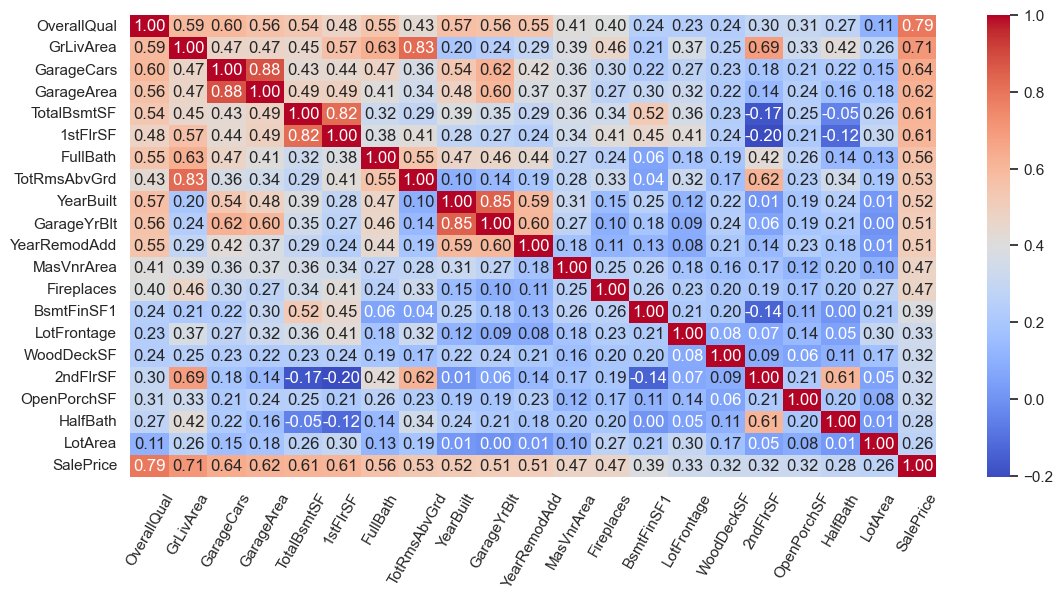

In [83]:
plt.figure(figsize=(13,6))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=60)
plt.show()

In [84]:
# Tính ma trận tương quan
df_corr = data[feature_lst].corr()

# Lọc các cột có tương quan với SalePrice lớn hơn 0.3 hoặc bé hơn -0.3
filtered_corr = df_corr[['SalePrice']].loc[(df_corr['SalePrice'] > 0.3) | (df_corr['SalePrice'] < -0.3)]
filtered_corr=filtered_corr.drop('SalePrice')
filtered_corr = filtered_corr.index.to_list()
filtered_corr_data=data[filtered_corr]

# In kết quả
filtered_corr_data


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,GarageYrBlt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,7,1710,2,548,856,856,2,8,2003,2003.0,2003,196.0,0,706,65.0,0,854,61
1,6,1262,2,460,1262,1262,2,6,1976,1976.0,1976,0.0,1,978,80.0,298,0,0
2,7,1786,2,608,920,920,2,6,2001,2001.0,2002,162.0,1,486,68.0,0,866,42
3,7,1717,3,642,756,961,1,7,1915,1998.0,1970,0.0,1,216,60.0,0,756,35
4,8,2198,3,836,1145,1145,2,9,2000,2000.0,2000,350.0,1,655,84.0,192,1053,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,1999.0,2000,0.0,1,0,62.0,0,694,40
1456,6,2073,2,500,1542,2073,2,7,1978,1978.0,1988,119.0,2,790,85.0,349,0,0
1457,7,2340,1,252,1152,1188,2,9,1941,1941.0,2006,0.0,2,275,66.0,0,1152,60
1458,5,1078,1,240,1078,1078,1,5,1950,1950.0,1996,0.0,0,49,68.0,366,0,0


In [85]:
X_num_scale=filtered_corr_data 

from sklearn.preprocessing import StandardScaler
# Chuẩn hóa các biến định lượng bằng StandardScaler
scaler = StandardScaler()
X_num_scale = scaler.fit_transform(X_num_scale)

# Chuyển đổi lại thành DataFrame với các tên cột ban đầu
X_num_scale = pd.DataFrame(X_num_scale, columns=filtered_corr)
X_num_scale

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,GarageYrBlt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,1.007405,0.878668,0.514104,-0.951226,0.575425,-0.220875,-0.752176,1.161852,0.216503
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.019300,-0.429577,-0.570750,0.600495,1.171992,0.460320,1.626195,-0.795163,-0.704483
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.931353,0.830215,0.325915,0.600495,0.092907,-0.084636,-0.752176,1.189351,-0.070361
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,0.817275,-0.720298,-0.570750,0.600495,-0.499274,-0.447940,-0.752176,0.937276,-0.176048
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.893327,0.733308,1.366489,0.600495,0.463568,0.641972,0.780197,1.617877,0.563760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.250402,0.311725,-0.060731,-0.238122,-0.542435,0.789741,0.296763,0.918511,0.855301,0.733308,-0.570750,0.600495,-0.973018,-0.357114,-0.752176,0.795198,-0.100558
1456,-0.071836,1.061367,0.311725,0.126420,1.104925,2.355701,0.789741,0.296763,0.222975,0.056753,0.151865,0.087911,2.152216,0.759659,0.687385,2.033231,-0.795163,-0.704483
1457,0.651479,1.569647,-1.026858,-1.033914,0.215641,0.065656,0.789741,1.527656,-1.002492,-1.350213,1.024029,-0.570750,2.152216,-0.369871,-0.175462,-0.752176,1.844744,0.201405
1458,-0.795151,-0.832788,-1.026858,-1.090059,0.046905,-0.218982,-1.026041,-0.934130,-0.704406,-1.007978,0.539493,-0.570750,-0.951226,-0.865548,-0.084636,2.168910,-0.795163,-0.704483


In [86]:
X_cat # từ biến định tính cũ

,FullBath,BedroomAbvGr,TotRmsAbvGrd,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,2,3,8,0,0,1,0,0,0,0,1,0,0
1,2,3,6,0,0,1,0,1,0,0,0,0,0
2,2,3,6,0,0,0,0,0,0,0,1,0,0
3,1,3,7,0,0,0,0,0,0,0,1,0,0
4,2,4,9,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,3,7,0,0,1,0,0,0,0,1,0,0
1456,2,3,7,0,0,1,0,1,0,0,0,0,0
1457,2,4,9,0,0,1,0,0,0,0,1,0,0
1458,1,2,5,0,0,1,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Xác định các tập X và y và nó đã chuẩn hóa ở phần 3
X1 = pd.concat([X_num_scale, X_cat], axis=1)  # Kết hợp các biến định lượng và định tính đã chuẩn hóa
y1 = data['SalePrice']  # Biến mục tiêu
X1

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,GarageYrBlt,...,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,1.007405,...,0,0,1,0,0,0,0,1,0,0
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.019300,...,0,0,1,0,1,0,0,0,0,0
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.931353,...,0,0,0,0,0,0,0,1,0,0
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,0.817275,...,0,0,0,0,0,0,0,1,0,0
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.893327,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.250402,0.311725,-0.060731,-0.238122,-0.542435,0.789741,0.296763,0.918511,0.855301,...,0,0,1,0,0,0,0,1,0,0
1456,-0.071836,1.061367,0.311725,0.126420,1.104925,2.355701,0.789741,0.296763,0.222975,0.056753,...,0,0,1,0,1,0,0,0,0,0
1457,0.651479,1.569647,-1.026858,-1.033914,0.215641,0.065656,0.789741,1.527656,-1.002492,-1.350213,...,0,0,1,0,0,0,0,1,0,0
1458,-0.795151,-0.832788,-1.026858,-1.090059,0.046905,-0.218982,-1.026041,-0.934130,-0.704406,-1.007978,...,0,0,1,0,1,0,0,0,0,0


In [88]:
# Chia dữ liệu thành 2 tập train và test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [89]:
# Tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình với tập train
model.fit(X_train, y_train)

LinearRegression()

In [90]:
# Đánh giá mô hình trên tập train
train_score = model.score(X_train, y_train)
print(f"Train Score (R-square): {train_score:.4f}")

# Đánh giá mô hình trên tập test
test_score = model.score(X_test, y_test)
print(f"Test Score (R-square): {test_score:.4f}")


Train Score (R-square): 0.7991
Test Score (R-square): 0.8229


<span style="font-size: 12px">

# Nhận xét

## Kết quả cũ
- **Train Score (R²): 0.6990**: Hệ số xác định trên tập huấn luyện là 0.6990, điều này có nghĩa là mô hình giải thích khoảng 69.9% sự biến động của dữ liệu huấn luyện. Đây là một mức độ khá tốt, tuy nhiên vẫn có thể cải thiện thêm.
- **Test Score (R²): 0.7426**: Hệ số xác định trên tập kiểm tra là 0.7426, cho thấy mô hình giải thích khoảng 74.26% sự biến động của dữ liệu kiểm tra. Kết quả này cho thấy mô hình tổng quát khá tốt với dữ liệu chưa thấy trước.

## Kết quả mới khi thay đổi các biến định tính mới
- **Train Score (R²): 0.7991**: Hệ số xác định trên tập huấn luyện là 0.7991, điều này có nghĩa là mô hình giải thích khoảng 79.91% sự biến động của dữ liệu huấn luyện, tức là một cải thiện đáng kể so với trước.
- **Test Score (R²): 0.8229**: Hệ số xác định trên tập kiểm tra là 0.8229, cho thấy mô hình giải thích khoảng 82.29% sự biến động của dữ liệu kiểm tra. Kết quả này cho thấy mô hình tổng quát tốt hơn so với dữ liệu chưa thấy trước.

# Kết luận
- **Hiệu suất cải thiện**: Sự gia tăng từ 0.6990 lên 0.7991 trên tập huấn luyện và từ 0.7426 lên 0.8229 trên tập kiểm tra chỉ ra rằng mô hình đã cải thiện đáng kể cả về khả năng học tập từ dữ liệu huấn luyện và khả năng tổng quát hóa với dữ liệu mới.
- **Khả năng dự đoán tốt hơn**: Với R² cao hơn trong cả hai tập dữ liệu, mô hình hiện tại có khả năng dự đoán tốt hơn nhiều so với mô hình ban đầu.
- **Tầm quan trọng của biến định tính**: Việc thay đổi các biến định tính đã mang lại hiệu quả đáng kể, cho thấy tầm quan trọng của việc lựa chọn và tiền xử lý các biến đầu vào đúng đắn.

</span>


### 2. Giống câu trên nhưng có chọn thêm các biến định tính nào có mối tương quan với biến SalePrice 

In [91]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [92]:
# Lọc các cột có kiểu dữ liệu là object
object_cols = data.select_dtypes(include=['object'])

# Kiểm tra các cột có giá trị thiếu và in ra số lượng giá trị thiếu lớn hơn 0
missing_values = object_cols.isnull().sum()

# In ra các cột có giá trị thiếu lớn hơn 0
missing_values_greater_than_zero = missing_values[missing_values > 0]
print(missing_values_greater_than_zero)


Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [93]:
# Lọc các cột có giá trị thiếu lớn hơn 0
object_cols_with_missing = object_cols[missing_values_greater_than_zero.index]

# Kiểm tra số lượng giá trị duy nhất trong các cột có giá trị thiếu
unique_values_count = object_cols_with_missing.nunique()

# In ra số lượng giá trị duy nhất trong các cột có giá trị thiếu lớn hơn 0
print("\nSố lượng giá trị duy nhất trong các cột có giá trị thiếu lớn hơn 0:")
print(unique_values_count)




Số lượng giá trị duy nhất trong các cột có giá trị thiếu lớn hơn 0:
Alley           2
MasVnrType      4
BsmtQual        4
BsmtCond        4
BsmtExposure    4
BsmtFinType1    6
BsmtFinType2    6
Electrical      5
FireplaceQu     5
GarageType      6
GarageFinish    3
GarageQual      5
GarageCond      5
PoolQC          3
Fence           4
MiscFeature     4
dtype: int64


In [94]:
# In ra các giá trị duy nhất trong các cột có giá trị thiếu
unique_values = object_cols_with_missing.apply(lambda x: x.unique())

# In ra các giá trị duy nhất trong các cột có giá trị thiếu
print("\nCác giá trị duy nhất trong các cột có giá trị thiếu lớn hơn 0:")
print(unique_values)


Các giá trị duy nhất trong các cột có giá trị thiếu lớn hơn 0:
Alley                                           [nan, Grvl, Pave]
MasVnrType                    [BrkFace, None, Stone, BrkCmn, nan]
BsmtQual                                    [Gd, TA, Ex, nan, Fa]
BsmtCond                                    [TA, Gd, nan, Fa, Po]
BsmtExposure                                [No, Gd, Mn, Av, nan]
BsmtFinType1                  [GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]
BsmtFinType2                  [Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]
Electrical                 [SBrkr, FuseF, FuseA, FuseP, Mix, nan]
FireplaceQu                             [nan, TA, Gd, Fa, Ex, Po]
GarageType      [Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...
GarageFinish                                 [RFn, Unf, Fin, nan]
GarageQual                              [TA, Fa, Gd, nan, Ex, Po]
GarageCond                              [TA, Fa, nan, Gd, Po, Ex]
PoolQC                                          [nan, Ex, Fa, Gd]
Fence       

In [95]:
"""
nhìn vào tập dữ liệu và trên đây thì thấy do bên tệp ghi NA hay NONE
dẫn tới là pandas nhận thành nan và missing value nên ta đổi thành No
"""


'\nnhìn vào tập dữ liệu và trên đây thì thấy do bên tệp ghi NA hay NONE\ndẫn tới là pandas nhận thành nan và missing value nên ta đổi thành No\n'

In [96]:
# Thay thế giá trị thiếu bằng 'No' cho các cột có giá trị thiếu
data['Alley'] = data['Alley'].fillna('No')
data['MasVnrType'] = data['MasVnrType'].fillna('No')
data['BsmtQual'] = data['BsmtQual'].fillna('No')
data['BsmtCond'] = data['BsmtCond'].fillna('No')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No')
data['Electrical'] = data['Electrical'].fillna('No')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No')
data['GarageType'] = data['GarageType'].fillna('No')
data['GarageFinish'] = data['GarageFinish'].fillna('No')
data['GarageQual'] = data['GarageQual'].fillna('No')
data['GarageCond'] = data['GarageCond'].fillna('No')
data['PoolQC'] = data['PoolQC'].fillna('No')
data['Fence'] = data['Fence'].fillna('No')
data['MiscFeature'] = data['MiscFeature'].fillna('No')

In [97]:
cat_cols1 = data.select_dtypes(include=['object']).columns
cat_cols1

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [98]:
# Khởi tạo hai danh sách để lưu các cột có giá trị duy nhất <= 10 và > 10
low_unique_cols = []
high_unique_cols = []

# Lặp qua các cột phân loại
for col in cat_cols1:
    if data[col].nunique() <= 10:
        low_unique_cols.append(col)  # Thêm cột vào danh sách low_unique_cols
    else:
        high_unique_cols.append(col)  # Thêm cột vào danh sách high_unique_cols

# In ra kết quả
print("Các cột có giá trị duy nhất <= 10:")
print(low_unique_cols)

print("Các cột có giá trị duy nhất > 10:")
print(high_unique_cols)


Các cột có giá trị duy nhất <= 10:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Các cột có giá trị duy nhất > 10:
['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [99]:
# In ra thông tin của các cột có giá trị duy nhất > 10
print("\nCác cột có giá trị duy nhất > 10:")
for col in high_unique_cols:
    num_unique = data[col].nunique()  # Số lượng giá trị duy nhất
    unique_vals = data[col].unique()  # Các giá trị duy nhất trong cột
    print(f"{col} - nunique: {num_unique}, unique values: {unique_vals}")


Các cột có giá trị duy nhất > 10:
Neighborhood - nunique: 25, unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Exterior1st - nunique: 15, unique values: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd - nunique: 16, unique values: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


# Tất cả đều có thể làm biến phân loại


In [100]:
# Chuyển tất cả các cột trong cat_cols1 thành kiểu dữ liệu 'category'
data[cat_cols1] = data[cat_cols1].astype('category')

# Kiểm tra lại kiểu dữ liệu của các cột sau khi chuyển
print(data[cat_cols1].dtypes)


MSZoning         category
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinType2     category
Heating          category
HeatingQC        category
CentralAir       category
Electrical       category
KitchenQual      category
Functional       category
FireplaceQu      category
GarageType       category
GarageFinish     category
GarageQual       category
GarageCond       category
PavedDrive       category
PoolQC      

In [101]:
X2=data.drop(columns='SalePrice')
y2=data['SalePrice']
X2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,MnPrv,No,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,4,2010,WD,Normal


In [102]:
# Lọc các cột có kiểu dữ liệu là category
object_cols = X2.select_dtypes(include=['category']).columns

# Chuyển đổi object_cols thành danh sách để dễ thêm cột
object_cols = list(object_cols)

# Lọc bỏ cột 'SalePrice' nếu nó có trong object_cols
if 'SalePrice' in object_cols:
    object_cols.remove('SalePrice')

# Kiểm tra danh sách các cột phân loại
data[object_cols]


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
1,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
2,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
3,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No,No,No,WD,Abnorml
4,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
1456,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,No,MnPrv,No,WD,Normal
1457,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,No,GdPrv,Shed,WD,Normal
1458,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No,No,No,WD,Normal


In [103]:
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd



# One-Hot Encoding các biến phân loại
X_cat_encoded = pd.get_dummies(data[object_cols], drop_first=True)

# Chuyển đổi SalePrice thành nhóm (chia thành 3 nhóm)
y_binned = pd.qcut(data['SalePrice'], q=3, labels=[0, 1, 2])

# Áp dụng SelectKBest để chọn các đặc trưng
chi2_selector = SelectKBest(chi2, k='all')  # Giữ lại tất cả các đặc trưng để xem điểm Chi2
X_chi2 = chi2_selector.fit_transform(X_cat_encoded, y_binned)

# Lấy điểm Chi-Square và tạo DataFrame kết quả
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_
chi2_results = pd.DataFrame({
    'Feature': X_cat_encoded.columns,
    'Chi2_Score': chi2_scores,
    'P_Value': chi2_pvalues
}).sort_values(by='Chi2_Score', ascending=False)

# Lọc các biến có P-Value nhỏ hơn 0.05 (có ý nghĩa thống kê)
significant_features = chi2_results[chi2_results['P_Value'] < 0.05]

# Tính tổng số lượng đặc trưng có ý nghĩa thống kê
total_significant_features = significant_features.shape[0]

# Chọn top N đặc trưng tốt nhất (ví dụ: top 40)
top_features = significant_features.head(40)['Feature'].tolist()

# In ra kết quả
print("Tổng số lượng đặc trưng có ý nghĩa thống kê (P-Value < 0.05):", total_significant_features)

print("\nTop 40 đặc trưng tốt nhất:")
print(top_features)



Tổng số lượng đặc trưng có ý nghĩa thống kê (P-Value < 0.05): 130

Top 40 đặc trưng tốt nhất:
['ExterQual_Gd', 'KitchenQual_TA', 'Foundation_PConc', 'ExterQual_TA', 'BsmtQual_TA', 'KitchenQual_Gd', 'GarageType_Detchd', 'GarageFinish_Unf', 'BsmtFinType1_GLQ', 'FireplaceQu_No', 'BsmtQual_Gd', 'MSZoning_RM', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'Neighborhood_NridgHt', 'HeatingQC_TA', 'GarageType_Attchd', 'Foundation_CBlock', 'GarageType_No', 'GarageCond_No', 'GarageQual_No', 'GarageFinish_No', 'MasVnrType_Stone', 'SaleType_New', 'SaleCondition_Partial', 'GarageFinish_RFn', 'FireplaceQu_Gd', 'Neighborhood_OldTown', 'FireplaceQu_TA', 'MasVnrType_None', 'HouseStyle_2Story', 'Neighborhood_NoRidge', 'Neighborhood_NAmes', 'Neighborhood_Edwards', 'MasVnrType_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_Somerst', 'Neighborhood_Gilbert', 'GarageType_BuiltIn', 'Neighborhood_IDOTRR']


In [104]:
# Bước 1: Lọc các đặc trưng định tính đã chọn
X_cat_selected = X_cat_encoded[top_features]

# Bước 2: Kết hợp các đặc trưng định lượng và định tính
X = pd.concat([X_num_scale, X_cat_selected], axis=1)

# Bước 3: Gán biến mục tiêu (SalePrice)
y = data['SalePrice']

# In kết quả

X.head()



,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,GarageYrBlt,...,HouseStyle_2Story,Neighborhood_NoRidge,Neighborhood_NAmes,Neighborhood_Edwards,MasVnrType_BrkFace,BsmtExposure_Gd,Neighborhood_Somerst,Neighborhood_Gilbert,GarageType_BuiltIn,Neighborhood_IDOTRR
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,1.007405,...,1,0,0,0,1,0,0,0,0,0
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.019300,...,0,0,0,0,0,1,0,0,0,0
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.931353,...,1,0,0,0,1,0,0,0,0,0
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,0.817275,...,1,0,0,0,0,0,0,0,0,0
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.893327,...,1,1,0,0,1,0,0,0,0,0


In [105]:
# Chia dữ liệu thành 2 tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình với tập train
model.fit(X_train, y_train)

LinearRegression()

In [107]:
# Đánh giá mô hình trên tập train
train_score = model.score(X_train, y_train)
print(f"Train Score (R-square): {train_score:.4f}")

# Đánh giá mô hình trên tập test
test_score = model.score(X_test, y_test)
print(f"Test Score (R-square): {test_score:.4f}")


Train Score (R-square): 0.8366
Test Score (R-square): 0.8638


<span style="font-size: 12px">

# Nhận xét

##### Khi dùng 50 đến tổng đặc trung tốt nhất dẫn tới overfitting như kết quả bên dưới nên đó ta giới hạn chọn lại 40 tốt nhất 

## Kết quả mới khi thêm vào các cột biến phân loại
- **Train Score (R²): 0.9304**: Hệ số xác định trên tập huấn luyện là 0.9304, cho thấy mô hình giải thích khoảng 93.04% sự biến động của dữ liệu huấn luyện. Đây là một mức độ rất cao, cho thấy mô hình học rất tốt trên tập huấn luyện.
- **Test Score (R²): -48213270786446544863232.0000**: Hệ số xác định trên tập kiểm tra là một giá trị âm rất lớn, điều này là bất thường và chỉ ra rằng mô hình hoàn toàn không khớp với dữ liệu kiểm tra.

# Kết luận
- **Vấn đề nghiêm trọng với tập kiểm tra**: Giá trị R² âm rất lớn trên tập kiểm tra cho thấy mô hình không phù hợp với dữ liệu kiểm tra. Điều này có thể là do overfitting, tức là mô hình học quá kỹ từ dữ liệu huấn luyện và không tổng quát hóa được với dữ liệu mới.
- **Hiệu suất mô hình trên tập huấn luyện**: Mặc dù mô hình có hiệu suất rất cao trên tập huấn luyện, nhưng điều này không có ý nghĩa nếu mô hình không thể tổng quát hóa được với dữ liệu kiểm tra.
- **Cần điều chỉnh mô hình**: Cần kiểm tra lại các biến phân loại đã thêm vào và xem xét việc giảm độ phức tạp của mô hình, chẳng hạn như loại bỏ bớt các biến không cần thiết hoặc điều chỉnh các siêu tham số của mô hình để tránh overfitting.
- **Tầm quan trọng của đánh giá mô hình**: Kết quả này nhấn mạnh tầm quan trọng của việc đánh giá mô hình trên dữ liệu kiểm tra để đảm bảo rằng mô hình có khả năng tổng quát hóa tốt và đưa ra các dự đoán chính xác trên dữ liệu mới.


## Kết quả mới sau khi giới hạn chọn 40 biến đặc trưng tốt nhất 
- **Train Score (R²): 0.8366**: Hệ số xác định trên tập huấn luyện là 0.8366, cho thấy mô hình giải thích khoảng 83.66% sự biến động của dữ liệu huấn luyện. 
- **Test Score (R²): 0.8638**: Hệ số xác định trên tập kiểm tra là 0.8638, cho thấy mô hình giải thích khoảng 86.38% sự biến động của dữ liệu kiểm tra. Kết quả này cho thấy mô hình tổng quát rất tốt với dữ liệu chưa thấy trước.

# Kết luận 
- **Giảm overfitting**: Bằng cách giới hạn chọn lại các biến đặc trưng tốt nhất, mô hình đã giảm hiện tượng overfitting và có hiệu suất tổng quát hóa tốt hơn nhiều. 
- **Hiệu suất mô hình trên tập huấn luyện**: Mặc dù train score giảm so với kết quả trước đó, điều này cho thấy mô hình ít bị overfitting hơn và phù hợp hơn với dữ liệu mới. 
- **Khả năng dự đoán tốt hơn**: Test score cao hơn cho thấy mô hình có khả năng dự đoán tốt hơn nhiều so với dữ liệu chưa thấy trước. 
- **Tầm quan trọng của lựa chọn đặc trưng**: Việc chọn đúng các biến đặc trưng và giảm bớt các biến không cần thiết giúp cải thiện hiệu suất mô hình và tăng khả năng tổng quát hóa.

</span>
